# Shimming of the OSI2 <b>V1</b> magnet

## iteration 3
### with 3 shimming rings

# test of euler rotations

#### the three euler angles are used for rotating the path of the magnet
#### run this to rotate a vector *r* in COSI coordinates 
#### to a vector *r_centered_rotated_shifted* in magnet coordinates  

In [1]:

#euler test
import numpy as np

r = np.asarray([1,0,0])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[1 0 0]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[ 2.22044605e-16  2.22044605e-16 -1.00000000e+00]


# -----------------------------
# --- **MAP PROCESSING** ---
# -----------------------------

# Import the map

In [2]:
# import the shell map from a csv file
import numpy as np  
import b0
b0map_iter2_SHELL = b0.b0() # shell map after iteration 2.
filename_to_import_csv_data_from_SHELL = r'./data/240925/240925_sphere_R120_FOUR_RINGS_ITER2_with_mismatch_bvals.csv' # change this filename for the iteration 4
# import map from csv file, if not specified during the measurement, explicitly give the euler angles for the orientation of the magnet
b0map_iter2_SHELL.import_from_csv(filename_to_import_csv_data_from_SHELL,eulers=[90,0,-90])
# transfer to magnet coordinates. center path. rotate path. sample points on a regular 3d grid with a given stepsize [mm], filter the data points of the field component component if gaussmeter is glitching
b0map_iter2_SHELL.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=10,onesign=True,component=2)


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240925/240925_sphere_R120_FOUR_RINGS_ITER2_with_mismatch_bvals.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240925/240925_sphere_R120_FOUR_RINGS_ITER2_with_mismatch
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-4.80000000e-05 -6.40000000e-05 -9.84528015e-15]
ROTATING THE MAGNET NOW!
len(path.r)= 2500
len(b0Data)= 2500
-119.70611200000005  < x <  119.70388799999998
-119.86506399999999  < y <  119.864936
-119.93904800000001  < z <  119.94095199999998
[0.1400000000000432, 0.21999999999997044, 0.30000000000001137, 0.38999999999998636, 0.44999999999998863, 0.5300000000000296, 0.5799999999999841, 0.6299999999999955, 0.660000000000025, 0.6999999999999886, 0.7100

c:\cosi-measure\Software\COSI2\b0.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(meanField_raw)/abs(self.fieldDataAlongPath[idx,component])>filtering:


[[ -0.321  -1.945 -47.562  47.601]]
mean:  47.5027056
ratio pt/mean:  1.0019639807632346
[[ -0.261  -1.949 -47.596  47.64 ]]
mean:  47.5027056
ratio pt/mean:  1.0006798433813842
[]
mean:  47.5027056
ratio pt/mean:  0.9996483231894059
[]
mean:  47.5027056
ratio pt/mean:  0.9995220145944698
[]
mean:  47.5027056
ratio pt/mean:  0.9995009631619804
[]
mean:  47.5027056
ratio pt/mean:  0.9993325517020655
[]
mean:  47.5027056
ratio pt/mean:  0.9995220145944698
[[ -0.337  -1.987 -47.48   47.523]]
mean:  47.5027056
ratio pt/mean:  1.0009535120037458
[[ -0.358  -1.996 -47.548  47.587]]
mean:  47.5027056
ratio pt/mean:  1.0022797522505749
[[ -0.298  -1.987 -47.611  47.65 ]]
mean:  47.5027056
ratio pt/mean:  1.0018797750332773
[[ -0.235  -1.997 -47.592  47.634]]
mean:  47.5027056
ratio pt/mean:  1.0003851233265333
[[ -0.244  -2.01  -47.521  47.569]]
mean:  47.5027056
ratio pt/mean:  0.9998798889467888
[[ -0.302  -2.024 -47.497  47.543]]
mean:  47.5027056
ratio pt/mean:  1.0007429976788522
[[ -0.33

# Plot the shell map

mean, mT:  -47.51544607190414
low, mT: -47.62 
high, mT: -47.415
raw homo after Iteration 2: 4314 ppm


<Figure size 640x480 with 0 Axes>

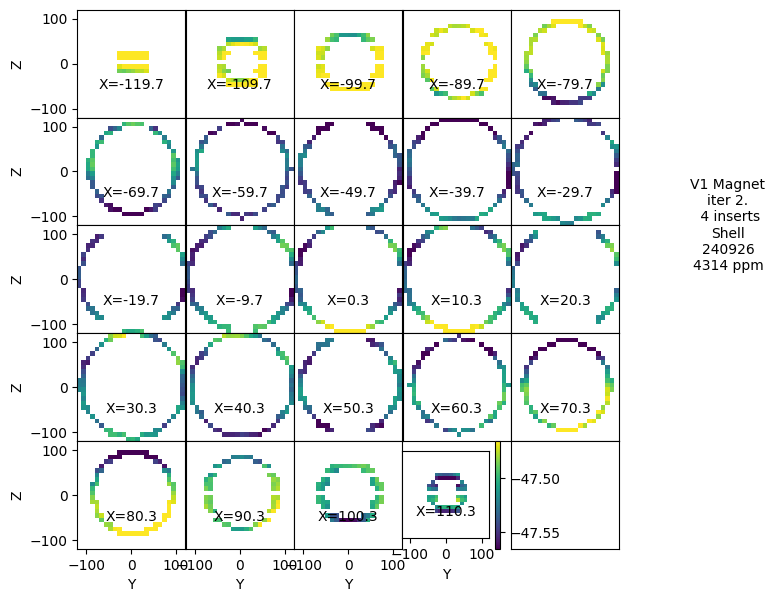

In [4]:
# shimmed field (RAW, without mismatch)
# save shimmed field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

xvals_raw = b0map_iter2_SHELL.xPts # x points of the rotated and centered path in the magnet coordinates
y = b0map_iter2_SHELL.yPts # y -//-
z = b0map_iter2_SHELL.zPts # z -//-

FieldMeasured_shell_iter_2 = b0map_iter2_SHELL.b0Data[:,:,:,2]# b0Data is the raw data of the map.


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7))

# extreme values and homogeneity of the measrued field
print('mean, mT: ',np.nanmean(FieldMeasured_shell_iter_2))
print('low, mT:',np.nanmin(FieldMeasured_shell_iter_2),'\nhigh, mT:',np.nanmax(FieldMeasured_shell_iter_2))

homoshimmed= (np.nanmax(FieldMeasured_shell_iter_2)-np.nanmin(FieldMeasured_shell_iter_2))/np.nanmean(FieldMeasured_shell_iter_2)*1e6

# plot the mapped points, slices along X.       
for i in range(5):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2, 3, 'V1 Magnet\niter 2.\n 4 inserts\nShell\n240926\n%.0f ppm'%abs(homoshimmed), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shell_iter_2[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shell_iter_2)-0.05,np.nanmean(FieldMeasured_shell_iter_2)+0.05],origin = 'lower',extent=[-120,120,-120,120],cmap='viridis')
        #xxx = axes[i,j].contourf(z,y,FieldMeasured_shimmed[i*5+j,:,:],vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)



homo_after_iteration_2 = (np.nanmax(abs(FieldMeasured_shell_iter_2))-np.nanmin(abs(FieldMeasured_shell_iter_2)))/np.nanmean(abs(FieldMeasured_shell_iter_2))*1e6
print('raw homo after Iteration 2: %.0f ppm'%homo_after_iteration_2)

plt.show()


# Do SPH decomposition of the shell data

In [5]:

# spherical decomposition
diameter_of_sphere = b0map_iter2_SHELL.path.radius*2
order = 12
resolution_of_sph_decomp = 7
print(diameter_of_sphere)

b0map_iter2_SHELL.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp,component=2)

240.01264478121482
[24, 24, 24]
Mean field strength in 24 cm sphere: -47.52 mT
Inhomogeneity in 24 cm sphere: -4272 ppm
Inhomogeneity of fit: 4569 ppm
Error: -817 ppm
saved numpy array as ./data/tmp/SpHData.npy


# Extrapolate the shell data into the volume

In [6]:
resolution_of_sph_fit=5 # [mm] - step of the interpolated map, within the volume
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter2_SHELL.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)

interpolating field with sph order 12, resol 5 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 4613 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


# Plot the extrapolated field map

mean, mT:  -47.51450248207058
low, mT: -47.62921351862969 
high, mT: -47.41001651003147


<Figure size 640x480 with 0 Axes>

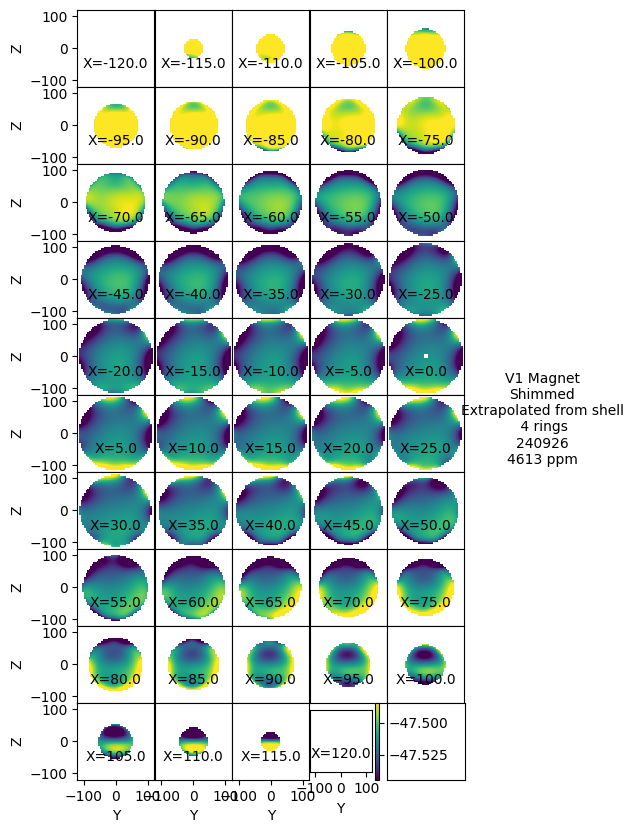

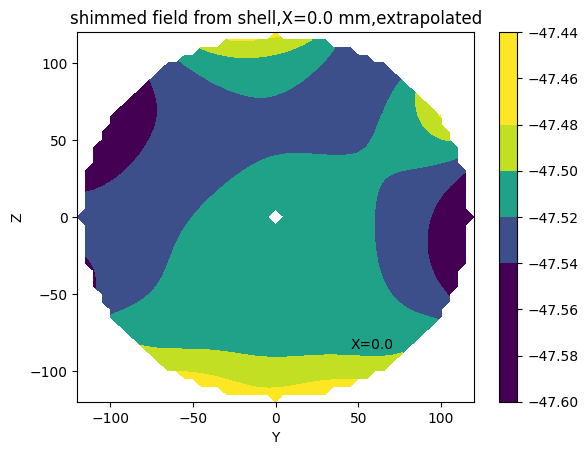

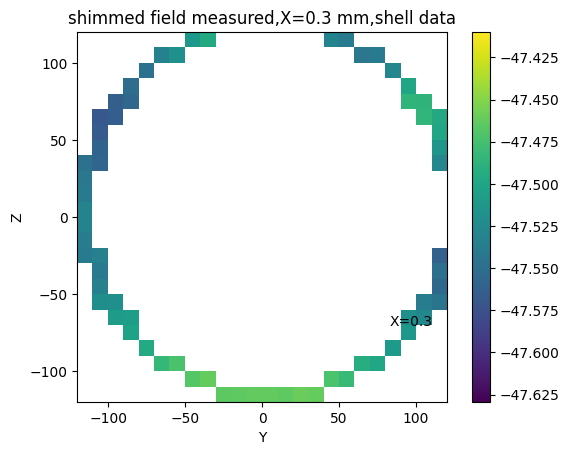

In [7]:

# shimmed field measured (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_fine = b0map_iter2_SHELL.yDim_SPH_fine
y = b0map_iter2_SHELL.yDim_SPH_fine
z = b0map_iter2_SHELL.zDim_SPH_fine

FieldMeasured_shimmed_from_shell = b0map_iter2_SHELL.interpolatedField


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_shimmed_from_shell))
print('low, mT:',np.nanmin(FieldMeasured_shimmed_from_shell),'\nhigh, mT:',np.nanmax(FieldMeasured_shimmed_from_shell))

homoinit = (np.nanmax(FieldMeasured_shimmed_from_shell)-np.nanmin(FieldMeasured_shimmed_from_shell))/np.nanmean(FieldMeasured_shimmed_from_shell)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.0, 5, '\n\n\nV1 Magnet\nShimmed\nExtrapolated from shell\n 4 rings\n240926\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shimmed_from_shell[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shimmed_from_shell)-0.03,np.nanmean(FieldMeasured_shimmed_from_shell)+0.03],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx_finegrid = int(len(b0map_iter2_SHELL.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_shimmed_from_shell[xsliceidx_finegrid,:,:]),vmin=np.nanmean(FieldMeasured_shimmed_from_shell)-0.03,vmax=np.nanmean(FieldMeasured_shimmed_from_shell)+0.03)
plt.text(0.0, 0.0, 'X=%.1f'%xvals_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field from shell,X=%.1f mm,extrapolated'%b0map_iter2_SHELL.xDim_SPH_fine[xsliceidx_finegrid])
plt.colorbar()
plt.show()

xsliceidx_rawgrid = int(len(b0map_iter2_SHELL.xPts)/2)
plt.imshow(np.transpose(b0map_iter2_SHELL.b0Data[xsliceidx_rawgrid,:,:,2]),clim=[np.nanmin(FieldMeasured_shimmed_from_shell),np.nanmax(FieldMeasured_shimmed_from_shell)],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter2_SHELL.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,shell data'%b0map_iter2_SHELL.xPts[xsliceidx_rawgrid])
plt.colorbar()
plt.show()


# ---------------------
# --- **SHIMMING** ---
# ---------------------

# Defining magnet positions in the ring

In [9]:
# positioning the rings

def ringposFromTrayNr(trays_ocp):
    '''
    calculates position of the ring in meters by the position in the shim tray (TrayNr)
    TrayNr is counted from the middle of the tray, +1 means 4.5 mm in +X direction (along the bore, towards the back lid of the magnet)
    '''
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          =276*1e-3  # radius on which the shim magnets are placed

trays_occupied = [-20,-18,-9]  # [-13,-5,1,13] # for iteration 2 [-16, -8, 8, 16] # for iteration 1

# so far occupied inserts are [-16,-13,-8,-5,1,8,13,16]

ringPositions_iter_3       = ringposFromTrayNr(trays_occupied) # positions on X in meters where shim rings are placed
print('rings at ',np.array(ringPositions_iter_3)*1e3,'mm')


rings at  [-175.5 -157.5  -76.5] mm


In [10]:
# calculating the positions of shim magnets

magsPerSegment      = 7     # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions_iter_3 = []

for ringPosition in ringPositions_iter_3:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            positions_iter_3.append(position)
                
print(len(positions_iter_3))

for pos in positions_iter_3:
    print('x',pos[0],'y',pos[1],'z',pos[2])

let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
252
x -0.1755 y 0.27211479674710887 z -0.04614691096140277
x -0.1755 y 0.2742709847847707 z -0.030845208788272026
x -0.1755 y 0.27556740718070843 z -0.015446815196073495
x -0.1755 y 0.276 z 0.0
x -0.1755 y 0.27556740718070843 z 0.0154468151960735
x -0.1755 y 0.2742709847847707 z 0.030845208788272037
x -0.1755 y 0.27211479674710887 z 0.04614691096140277
x -0.1755 y 0.2587317822093368 z 0.09609300117480107
x -0.1755 y 0.2529482447387227 z 0.11042275799670676
x -0.1755 y 0.2463717826715406 z 0.12440636922299107
x -0.1755 y 0.2390230114445051 z 0.13799999999999998
x -0.1755 y 0.2309249674754671 z 0.15116103795771738
x -0.1755 y 0.22210303595045067 z 0.16384822678806393
x -0.1755 y 0.21258487124793404 z 0.17602179557230782
x -0.1755 y 0.17602179557230782 z 0.21258487124793404
x -0.1755 y 0.16384822678806393 z 0.22210303595045067
x -0.1755 y 0.15116103795771738 z 0.2309249674754671
x -0.1755 y 0.1380000000000000

# plot the calculated magnet positions

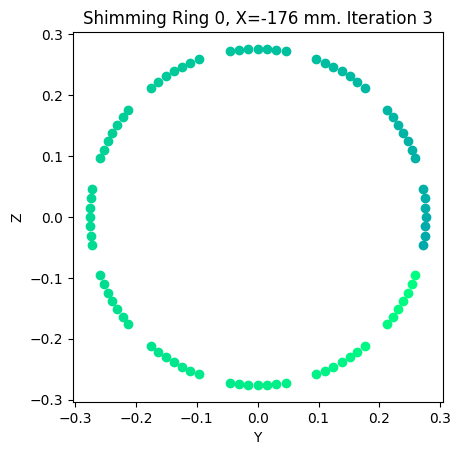

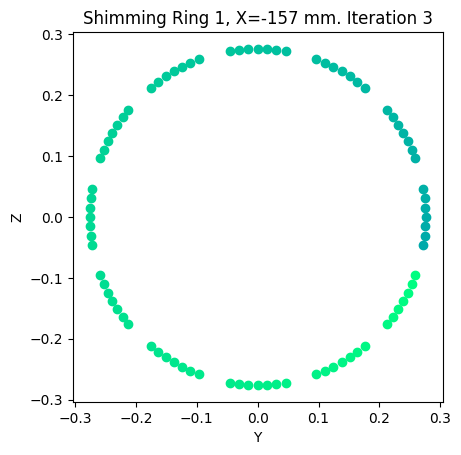

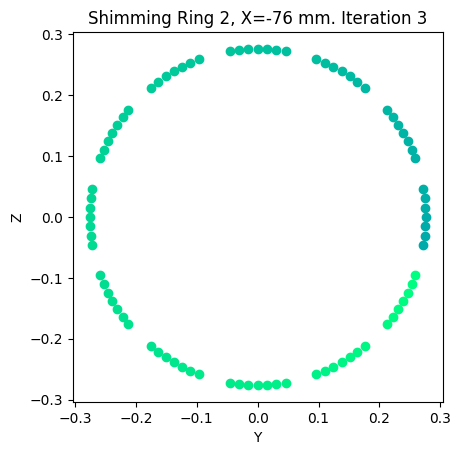

In [17]:
import matplotlib.pyplot as plt

for ringNumber, ringposition in enumerate(ringPositions_iter_3):
    axs = plt.axes()
    for idx,position in enumerate(positions_iter_3):
        if position[0] == ringPosition:
            axs.scatter(position[1],position[2],color = [0,idx/len(positions_iter_3),1-idx/len(positions_iter_3)/2])
    
    axs.set_aspect(1)
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title('Shimming Ring %.0f, X=%.0f mm. Iteration 3'%(ringNumber,ringposition*1e3))
    plt.show()

# Render fields of shim magnets

In [18]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3 # [m] size of shim magnets

bRem                = 1.35   # [T] remanence field of shim magnets


initialField = b0map_iter2_SHELL.interpolatedField

numMags_iter_3 = len(positions_iter_3)
coordinate_grid = b0map_iter2_SHELL.coord_grid_fine # coordinate grid to render the fields on


magnetFields_iter_3 = np.zeros((np.shape(initialField)+(3,numMags_iter_3)), dtype = np.float32) # array of magnets fields


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom


from utils import shimming_magnet


DSV = 2*max(b0map_iter2_SHELL.xDim_SPH_fine) # diameter of the sphere where fields will be optimized


# define the function to calculate the magnets fields

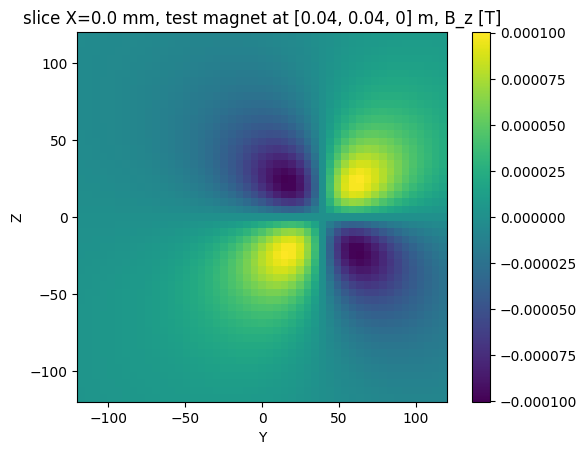

In [24]:
dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


def NEW_singleMagnet(position,dipoleVector,xPts,yPts,zPts):
    '''
    renders 3 components o the field of one magnet in a cubic grid made of xPts, yPts and zPts
    '''
    x,y,z = np.meshgrid(xPts, yPts, zPts, indexing='xy')  
    coord = [x,y,z]
    
    B0 = B0 = np.zeros((len(xPts),len(yPts),len(zPts))+(3,), dtype=np.float32)
    for i in range(len(xPts)):
        for j in range(len(yPts)):
            for k in range(len(zPts)):
                x_i = xPts[i]*1e-3-position[0]
                y_j = yPts[j]*1e-3-position[1]
                z_k = zPts[k]*1e-3-position[2]
                
                rabs = np.sqrt((x_i)**2+(y_j)**2+(z_k)**2)
                
                m_x = dipoleVector[0]
                m_y = dipoleVector[1]
                m_z = dipoleVector[2]
                
                
                
                B0[i,j,k,0] = 3*x_i*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_x/rabs**3
                B0[i,j,k,1] = 3*y_j*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_y/rabs**3
                B0[i,j,k,2] = 3*z_k*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_z/rabs**3
            
    
    return B0
    
xpts = b0map_iter2_SHELL.xDim_SPH_fine
ypts = b0map_iter2_SHELL.yDim_SPH_fine
zpts = b0map_iter2_SHELL.zDim_SPH_fine

positionofsinglemagnet = [40e-3,40e-3,0]
onemagnetfield = NEW_singleMagnet(position=positionofsinglemagnet,dipoleVector=dip_vec,xPts = xpts,yPts=ypts,zPts=zpts)     

plt.show()
xsliceidx = int(len(xpts)/2)
plt.imshow(np.transpose(onemagnetfield[xsliceidx,:,:,2]),origin='lower',extent=[np.nanmin(ypts),np.nanmax(ypts),np.nanmin(zpts),np.nanmax(zpts)])
plt.title('slice X=%.1f mm, '%xpts[xsliceidx]+'test magnet at '+str(positionofsinglemagnet)+' m, B_z [T]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

# Render the fields of all magnets in the considered volume

In [25]:
# Rendering shim magnets fields

shimming_magnets_iter_3 = []

for idx1, position in enumerate(positions_iter_3):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0) # this is the magnet object used for a quicker rendering of the fields. Not used now.
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    print('rendering magnet # ',str(idx1),' at ',str(position))
    
    magnetFields_iter_3[:,:,:,:,idx1] = NEW_singleMagnet(position=position,dipoleVector=dip_vec,xPts=b0map_iter2_SHELL.xDim_SPH_fine,yPts=b0map_iter2_SHELL.yDim_SPH_fine,zPts = b0map_iter2_SHELL.zDim_SPH_fine)
    # this is the time consuming rendering of the magnetic fields
    
    shimming_magnets_iter_3.append(magnet)
    
    
    print(magnet)

magnetFields_iter_3 *= 1e3

print(DSV)

magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  0  at  [-0.1755, 0.27211479674710887, -0.04614691096140277]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  1  at  [-0.1755, 0.2742709847847707, -0.030845208788272026]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  2  at  [-0.1755, 0.27556740718070843, -0.015446815196073495]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  3  at  [-0.1755, 0.276, 0.0]
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
rendering magnet #  4  at  [-0.1755, 0.27556740718070843, 0.0154468151

# rotated field vs. rendered field
## just a demo to see that rotation is as good as rendering
### in the simulation rotation of field is used

magnet at  [-175.5         272.11479675  -46.14691096]


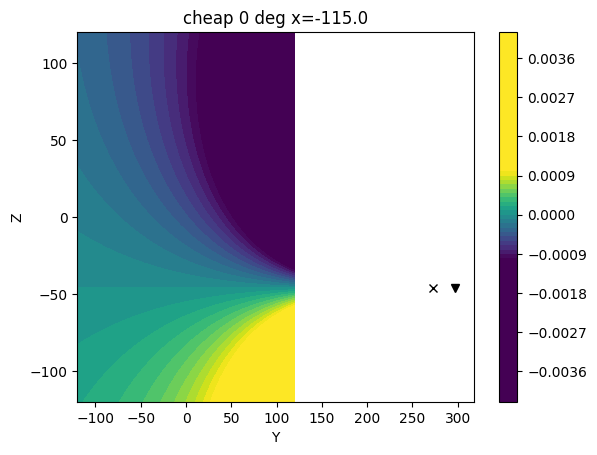

ROTATION OF EXPENSIVE MAGNET:-0
[ 0.00000000e+00  2.32047907e-08 -0.00000000e+00]
1.35


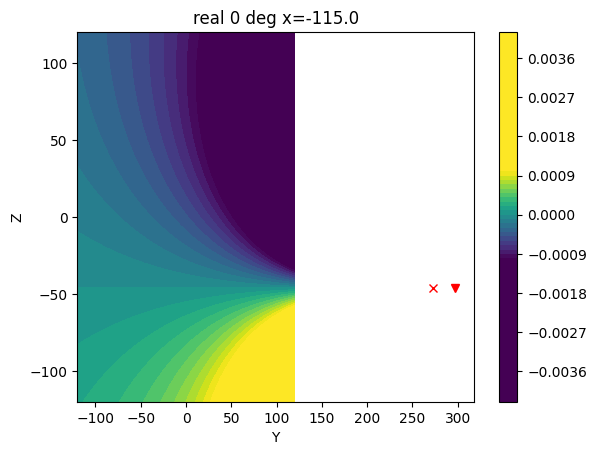

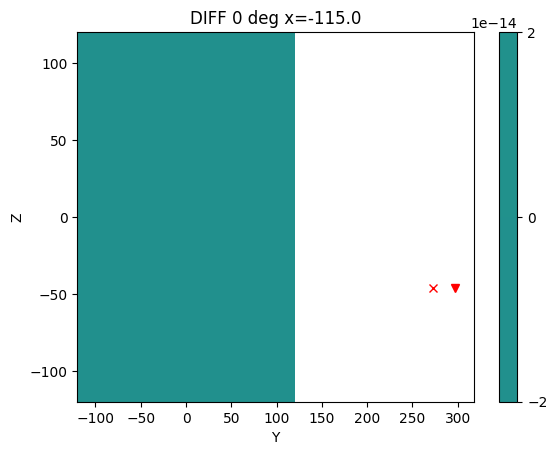

magnet at  [-175.5         272.11479675  -46.14691096]


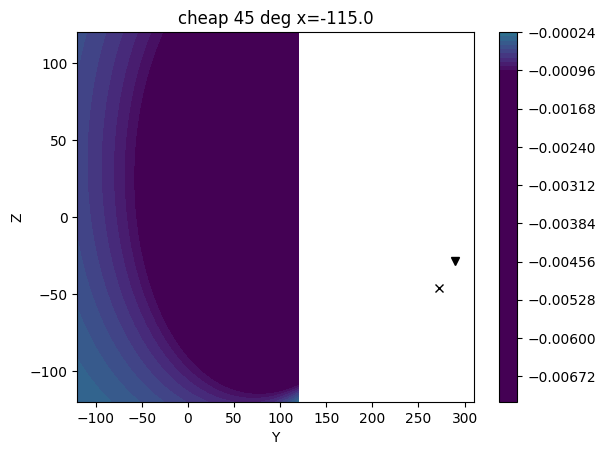

ROTATION OF EXPENSIVE MAGNET:-45
[ 0.00000000e+00  1.64082649e-08 -1.64082649e-08]
1.35


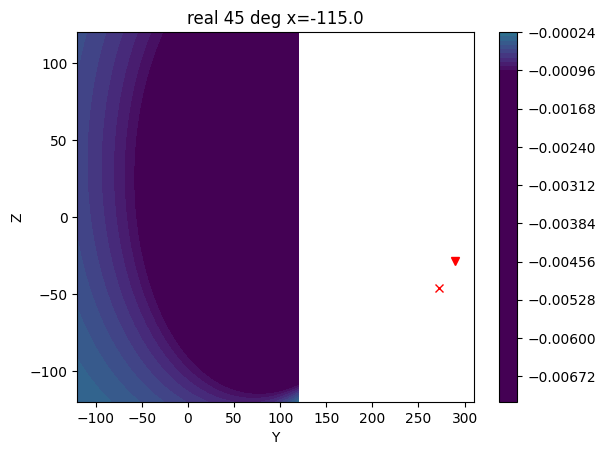

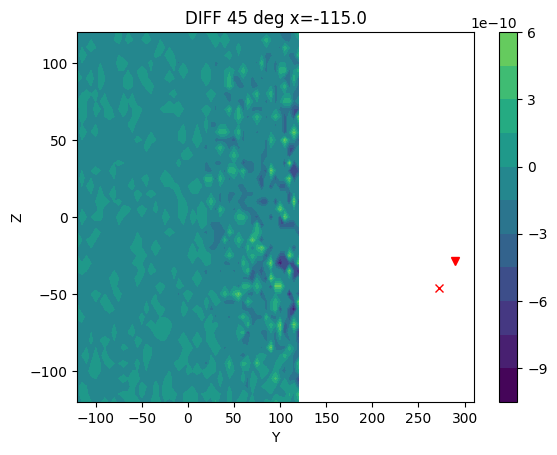

magnet at  [-175.5         272.11479675  -46.14691096]


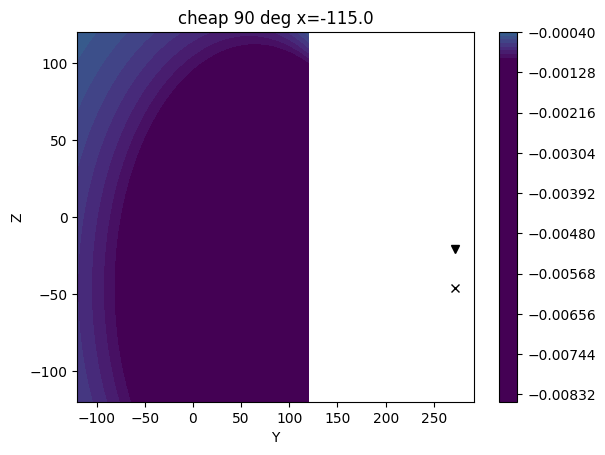

ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35


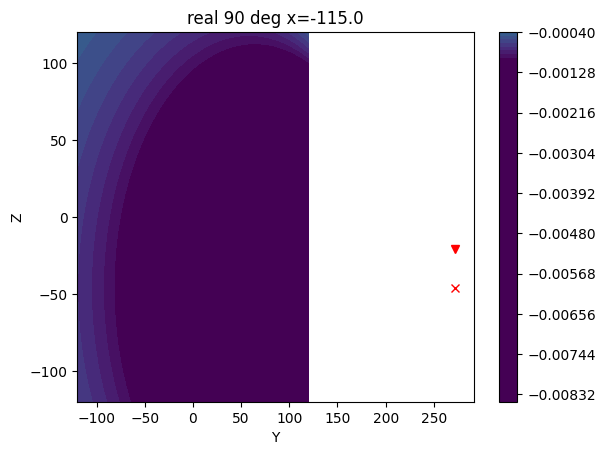

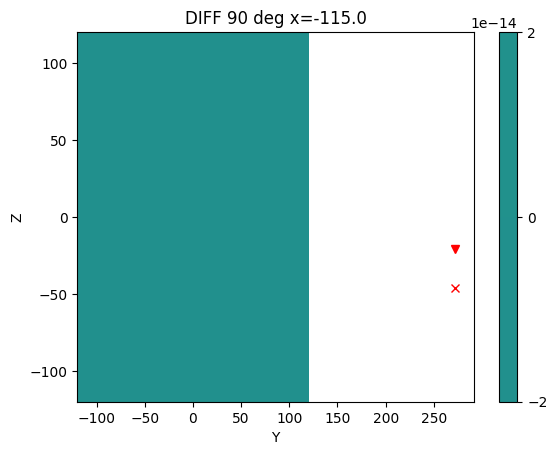

In [33]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

x = b0map_iter2_SHELL.xDim_SPH_fine*1e0
y = b0map_iter2_SHELL.yDim_SPH_fine*1e0
z = b0map_iter2_SHELL.zDim_SPH_fine*1e0

magnet_index = 0 # which magnet is considered
yzsliceidx = 1 #int(len(x)/2)
dipole_pointer_length = 25 # for ploting, how long is the arrow that shows the magnetic moment

for i in range(3): # consider a few rotations
    alpha = i*2*np.pi/8 # alpha is the angle between the magnetization vector and the Y axis. Alpha is counted from Y towards the Z axis. Alpha=pi/2 means magnetic moment points along +Z
    position = positions_iter_3[magnet_index] # to plot the point where magnet is located
    direction = [np.cos(alpha)*dipole_pointer_length,np.sin(alpha)*dipole_pointer_length] # to plot the magnetization vector
    
    cheapfield = magnetFields_iter_3[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)
    # cheapfield of a rotated magnet is made from the pre-rendered fields 
    
    print('magnet at ', np.array(positions_iter_3[magnet_index])*1e3)
    plt.contourf(y,z,np.transpose(cheapfield),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xk')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vk')
    
    plt.title('cheap %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter2_SHELL.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    # rendered field is the field of a magnet at position position with a magnetization vector turned by -alpha in the yz plane. 
    magnet = shimming_magnets_iter_3[magnet_index]
    magnet.rotation_yz = -alpha
    magnet.bRem = bRem
    magnet.B0 = magnet.B0*0
    magnet.render_field(grid=coordinate_grid)
    magnet.B0*=1e3

    plt.contourf(y,z,np.transpose(magnet.B0[yzsliceidx,:,:,2]),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xr')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vr')
    plt.title('real %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter2_SHELL.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    # difference between the rotated and rendered fields:
    plt.contourf(y,z,np.transpose(magnet.B0[yzsliceidx,:,:,2]-cheapfield),vmin=-1e-9, vmax=1e-9,levels=10)
    plt.plot(position[1]*1e3,position[2]*1e3,'xr')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vr')
    plt.title('DIFF %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter2_SHELL.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    

# Mask the fields of all shim magnets in the ball

[-0.1755, 0.27211479674710887, -0.04614691096140277]
[-0.1755, 0.2742709847847707, -0.030845208788272026]
[-0.1755, 0.27556740718070843, -0.015446815196073495]
[-0.1755, 0.276, 0.0]
[-0.1755, 0.27556740718070843, 0.0154468151960735]
[-0.1755, 0.2742709847847707, 0.030845208788272037]
[-0.1755, 0.27211479674710887, 0.04614691096140277]
[-0.1755, 0.2587317822093368, 0.09609300117480107]
[-0.1755, 0.2529482447387227, 0.11042275799670676]
[-0.1755, 0.2463717826715406, 0.12440636922299107]
[-0.1755, 0.2390230114445051, 0.13799999999999998]
[-0.1755, 0.2309249674754671, 0.15116103795771738]
[-0.1755, 0.22210303595045067, 0.16384822678806393]
[-0.1755, 0.21258487124793404, 0.17602179557230782]
[-0.1755, 0.17602179557230782, 0.21258487124793404]
[-0.1755, 0.16384822678806393, 0.22210303595045067]
[-0.1755, 0.15116103795771738, 0.2309249674754671]
[-0.1755, 0.13800000000000004, 0.23902301144450508]
[-0.1755, 0.12440636922299107, 0.2463717826715406]
[-0.1755, 0.11042275799670671, 0.2529482447387

<Figure size 640x480 with 0 Axes>

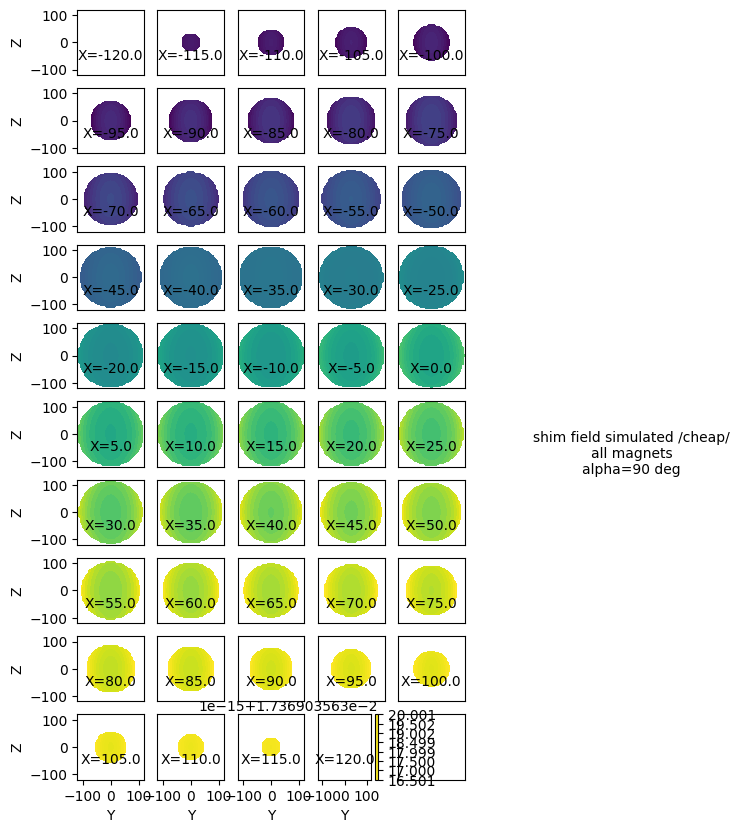

In [37]:
# this is another sanity check.
# not necessary to run
# assign all magnet rotations a certain angle
# rotate magnet fields and visualize the total field in the ball volume 
MagnetsField_simulated = shimming_magnets_iter_3[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions_iter_3):
    print(pos)
    alpha = np.pi/2#-np.pi/2#np.pi/2#np.pi/2
    cheapfield_onemagnet = magnetFields_iter_3[:,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[:,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter2_SHELL.sphere_mask
#MagnetsField_simulated*=1e3 

print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))

# expected shim field in the ball with all magnets same direction
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2_SHELL.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(3.5, 5, 'shim field simulated /cheap/\nall magnets\nalpha=%.0f deg'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,np.transpose(MagnetsField_simulated[i*5+j,:,:]),vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()



# Masking the shim magnet fields 

### with a spherical mask of diameter DSV

(49, 49, 49, 3, 252)


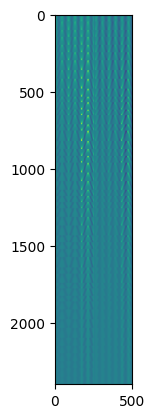

In [38]:
b0map = b0map_iter2_SHELL

DSV = b0map.path.radius*1.98 # 
DSV_INNER = b0map.path.radius*1.95 #!!! the optimization shell is close to the surface, but not at the surface 
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields_iter_3))

maskedFields = magnetFields_iter_3[sphereMask == 1, :,:].astype(float)
maskedFields_stacked_iter_3 = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # stacking Y and Z components of the rendered fields, masked with a spherical mask


plt.imshow(maskedFields_stacked_iter_3) #

# Rotating the stacked components of the masked fields [$B_y,B_z$]
### $B_z^{rotated}(\alpha) = B_y \times (-\sin(\alpha)) + B_z \times \cos(\alpha)$
### here check the dimensions of the arrays 

In [ ]:
print(np.shape(maskedFields_stacked_iter_3))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])


print('shape of masked fields',np.shape(maskedFields_stacked_iter_3))
print('shape of magnet rotation vector',np.shape(vector_of_magnet_rotations))
print('shape of stacked rotation vector',np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)

print('nr of field points to optimize',np.shape(rotatedFieldOfShimMagnetsStacked))

initialField_iteration_3 = b0map_iter2_SHELL.interpolatedField

initialFieldMasked_iteration_3 = initialField_iteration_3[sphereMask == 1]

# Least Squares Optimization
### 

In [43]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)+initialFieldMasked_iteration_3

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9



# run the lsq optimization of the 
### *vector of magnet rotations*

In [44]:
# now do the least squares optimization
#vector_of_magnet_rotations =np.load('optIter3_2rings.npy')# 2 ring shim
#vector_of_magnet_rotations =np.load('optIter3_1ring.npy')# 1 ring shim
vector_of_magnet_rotations =np.load('optIter3_3rings.npy')# 3 ring shim

#vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3)) # use initialy if no .npy saved

cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=10000, xtol = 1e-6,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))

optimized_vector_of_magnet_rotations = lsqData.x


#np.save('optIter3_2rings.npy',optimized_vector_of_magnet_rotations)
np.save('optIter3_3rings.npy',optimized_vector_of_magnet_rotations)

933210.8961777205


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.6524e+08                                    3.73e+03    
       1              5         4.6524e+08      3.64e+02       3.39e-02       2.18e+04    
       2              7         4.6524e+08      1.78e+02       1.74e-02       4.01e+04    
       3              9         4.6524e+08      7.22e+01       4.22e-03       1.94e+04    
       4             10         4.6524e+08      4.78e+01       4.38e-03       8.48e+03    
       5             11         4.6524e+08      4.26e+01       2.97e-03       1.34e+04    
       6             12         4.6524e+08      4.50e+01       8.69e-03       8.28e+03    
       7             13         4.6524e+08      6.22e+01       5.52e-03       1.16e+04    
       8             14         4.6524e+08      6.60e+01       5.57e-03       2.20e+04    
       9             15         4.6524e+08      2.87e+01       8.00e-03       2.39e+04    

# render the optimized shim field,
### shimmed field and homogeneity

In [45]:
shimField_Rendered = shimming_magnets_iter_3[0].B0[:,:,:,2]*0 # container for the shimmed field

# render the shim field by given rotations of each shimming magnet
for idx, magnet in enumerate(shimming_magnets_iter_3):
    alpha = optimized_vector_of_magnet_rotations[idx]

    magnet.rotation_yz = -alpha # beware of the sign
    magnet.bRem = bRem*1
    magnet.render_field(grid=coordinate_grid)
    shimField_Rendered += magnet.B0[:,:,:,2]

shimField_Rendered *= 1.0e3

shimmed_Field_simulated_RENDERED = initialField_iteration_3 +shimField_Rendered # shimmed field computed with rendering fields of each magnet
shimField_Rotated = np.matmul(magnetFields_iter_3[...,1,:], -np.sin(lsqData.x)) + \
    np.matmul(magnetFields_iter_3[...,2,:], np.cos(lsqData.x)) # shimmed field computed with rotating the pre-rendered fields

shimmed_Field_simulated_ROTATED = initialField_iteration_3+shimField_Rotated

homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_cheap = (np.nanmax(shimmed_Field_simulated_ROTATED)-np.nanmin(shimmed_Field_simulated_ROTATED))/np.nanmean(shimmed_Field_simulated_ROTATED)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_ROTATED))))


homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_fair = (np.nanmax(shimmed_Field_simulated_RENDERED)-np.nanmin(shimmed_Field_simulated_RENDERED))/np.nanmean(shimmed_Field_simulated_RENDERED)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_RENDERED))))

shimoffset = np.nanmean(shimmed_Field_simulated_ROTATED) - np.nanmean(initialField_iteration_3)


ROTATION OF EXPENSIVE MAGNET:-98
[ 0.00000000e+00 -3.10291820e-09 -2.29963956e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-98
[ 0.00000000e+00 -3.37994177e-09 -2.29573148e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-99
[ 0.00000000e+00 -3.43679424e-09 -2.29488727e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-99
[ 0.00000000e+00 -3.50973151e-09 -2.29378311e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-100
[ 0.00000000e+00 -3.83618576e-09 -2.28854974e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-101
[ 0.00000000e+00 -4.57797000e-09 -2.27487253e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-105
[ 0.00000000e+00 -5.81271280e-09 -2.24649656e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-124
[ 0.00000000e+00 -1.28624803e-08 -1.93136975e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-131
[ 0.00000000e+00 -1.52413419e-08 -1.74975372e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-139
[ 0.00000000e+00 -1.74298494e-08 -1.53187030e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-146
[ 0.00000000e+00 -1.92890228e-08 -1.28994539e-08]
1.35
ROTATION OF EXPENSIVE MAG

# plot the shim field

<Figure size 640x480 with 0 Axes>

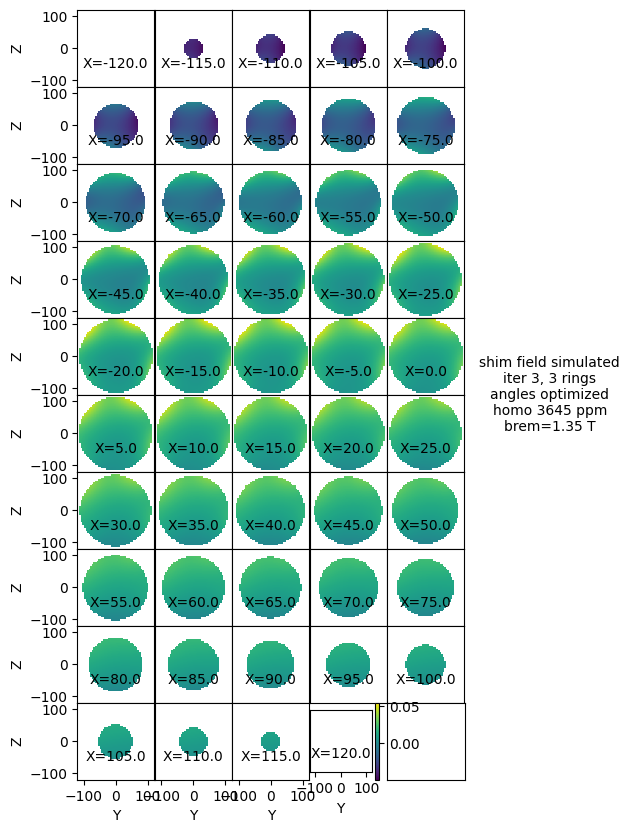

In [46]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2_SHELL.xDim_SPH_fine

simulated_shim_Field_masked = shimField_Rendered*b0map_iter2_SHELL.sphere_mask


for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.1, 5, 'shim field simulated\niter 3, 3 rings\nangles optimized\nhomo %.0f ppm\nbrem=%.2f T'%(abs(homo_fair),shimming_magnets_iter_3[0].bRem), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(simulated_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(simulated_shim_Field_masked),np.nanmax(simulated_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(y,z,np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),vmin=np.nanmin(optimized_shim_Field_masked),vmax=np.nanmax(optimized_shim_Field_masked),levels=16)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        #plt.xlabel('Z')
        #plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER3_3RINGS.png',format="png")
plt.savefig('./pics/shim_field_ITER3_3RINGS.pdf',format="pdf")
plt.show()


# plot the shimmed field

shimmed simulated HOMO,ppm: 3644.695854892596


<Figure size 640x480 with 0 Axes>

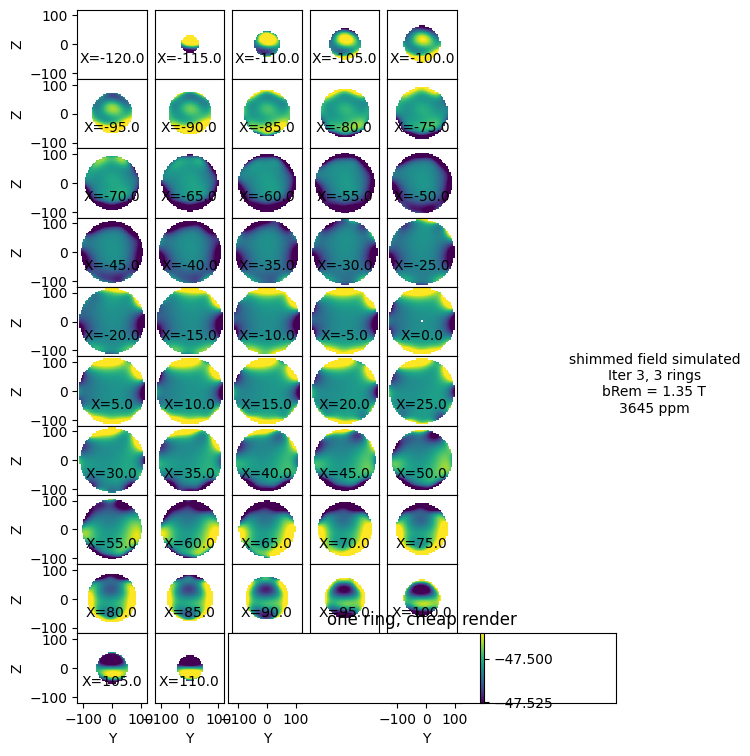

In [48]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(9, 9))

SIMULATED_SHIMMED_FIELD_TO_PLOT = shimmed_Field_simulated_RENDERED

shimoffset = np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT) - np.nanmean(FieldMeasured_shimmed_from_shell)

homoshimmed = abs((np.nanmax(SIMULATED_SHIMMED_FIELD_TO_PLOT)-np.nanmin(SIMULATED_SHIMMED_FIELD_TO_PLOT))/np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)*1e6)
#homoshimmed = abs((np.nanmax(shimmed_Field_simulated_flipped_Y)-np.nanmin(shimmed_Field_simulated_flipped_Y))/np.nanmean(shimmed_Field_simulated_flipped_Y)*1e6)

print('shimmed simulated HOMO,ppm:',homoshimmed)

xvals_raw = b0map_iter2_SHELL.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.1, 4.6, 'shimmed field simulated\nIter 3, 3 rings\nbRem = %.2f T\n%.0f ppm'%(shimming_magnets_iter_3[0].bRem,homoshimmed) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break

        xxx = axes[i,j].imshow(np.transpose(SIMULATED_SHIMMED_FIELD_TO_PLOT[i*5+j,:,:]),vmin=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)-0.02,vmax=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)+0.02,origin = 'lower',extent=[-120,120,-120,120])
      
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        plt.xlabel('Y')
        plt.ylabel('Z')

        
plt.title('one ring, cheap render')        
plt.subplots_adjust(wspace=-0.8, hspace=0.0)
plt.savefig('./pics/shimmed_field_ITER2_3rings.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_3rings.pdf',format="pdf")
plt.show()



# ---------------------
# --- RINGS FAB ---
# ---------------------


# **Magnet rotations in rings**

nr 0 Y 0.27211479674710887 Z -0.04614691096140277 a 97.68454439714331
nr 1 Y 0.2742709847847707 Z -0.030845208788272026 a 98.37533037155507
nr 2 Y 0.27556740718070843 Z -0.015446815196073495 a 98.51724609965277
nr 3 Y 0.276 Z 0.0 a 98.69939010064121
nr 4 Y 0.27556740718070843 Z 0.0154468151960735 a 99.5157487119154
nr 5 Y 0.2742709847847707 Z 0.030845208788272037 a 101.3782703533418
nr 6 Y 0.27211479674710887 Z 0.04614691096140277 a 104.50687898870935
nr 7 Y 0.2587317822093368 Z 0.09609300117480107 a 123.66270644876703
nr 8 Y 0.2529482447387227 Z 0.11042275799670676 a 131.05770251376165
nr 9 Y 0.2463717826715406 Z 0.12440636922299107 a 138.6884877787038
nr 10 Y 0.2390230114445051 Z 0.13799999999999998 a 146.22753830515515
nr 11 Y 0.2309249674754671 Z 0.15116103795771738 a 153.43669186675874
nr 12 Y 0.22210303595045067 Z 0.16384822678806393 a 160.1849133459763
nr 13 Y 0.21258487124793404 Z 0.17602179557230782 a 166.23171551064152
nr 14 Y 0.17602179557230782 Z 0.21258487124793404 a 180.4

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

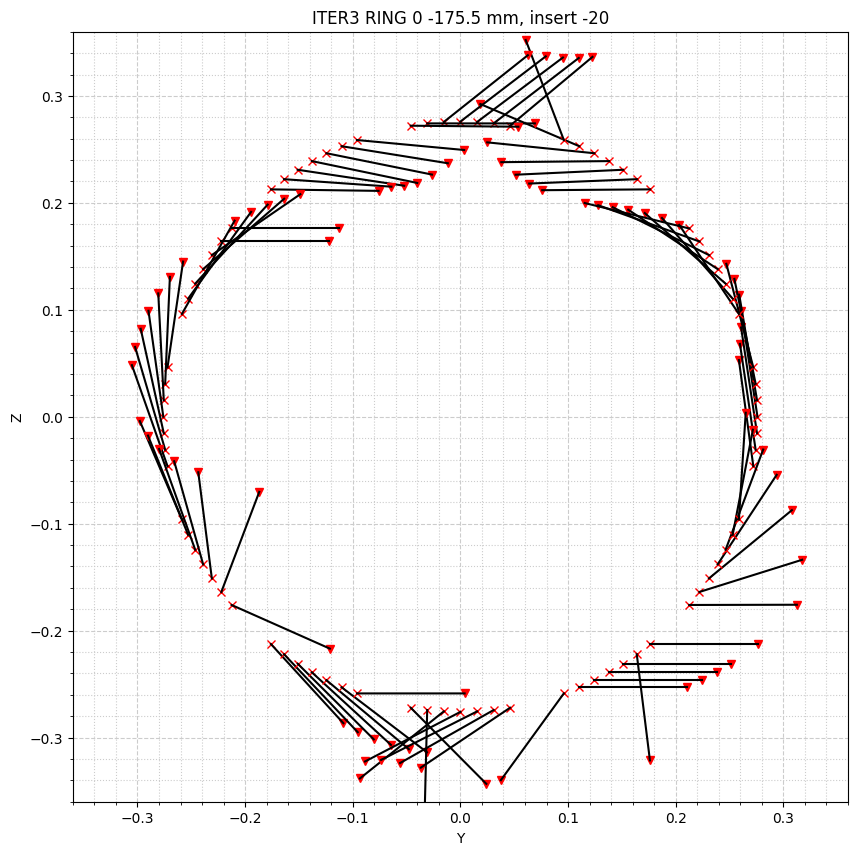

In [55]:
# MAGNET ROTATIONS RING 0
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 0
ringPosition = ringPositions_iter_3[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('ITER3 RING %d %.1f mm, insert %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions_iter_3):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xr')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        #axes.plot([YPOINT,YPOINT-direction[0]],[ZPOINT,ZPOINT-direction[1]],'k--')
        
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')



nr 84 Y 0.27211479674710887 Z -0.04614691096140277 a 159.18335391809254
nr 85 Y 0.2742709847847707 Z -0.030845208788272026 a 157.84757126854225
nr 86 Y 0.27556740718070843 Z -0.015446815196073495 a 146.7746905106518
nr 87 Y 0.276 Z 0.0 a 117.7403811387626
nr 88 Y 0.27556740718070843 Z 0.0154468151960735 a 91.34394540184165
nr 89 Y 0.2742709847847707 Z 0.030845208788272037 a 84.07935574316399
nr 90 Y 0.27211479674710887 Z 0.04614691096140277 a 87.36843075278104
nr 91 Y 0.2587317822093368 Z 0.09609300117480107 a 123.54611253722588
nr 92 Y 0.2529482447387227 Z 0.11042275799670676 a 136.32818623082167
nr 93 Y 0.2463717826715406 Z 0.12440636922299107 a 148.6096418758585
nr 94 Y 0.2390230114445051 Z 0.13799999999999998 a 160.00772493944626
nr 95 Y 0.2309249674754671 Z 0.15116103795771738 a 170.4297451504749
nr 96 Y 0.22210303595045067 Z 0.16384822678806393 a 179.976206677164
nr 97 Y 0.21258487124793404 Z 0.17602179557230782 a 188.78205098160296
nr 98 Y 0.17602179557230782 Z 0.212584871247934

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

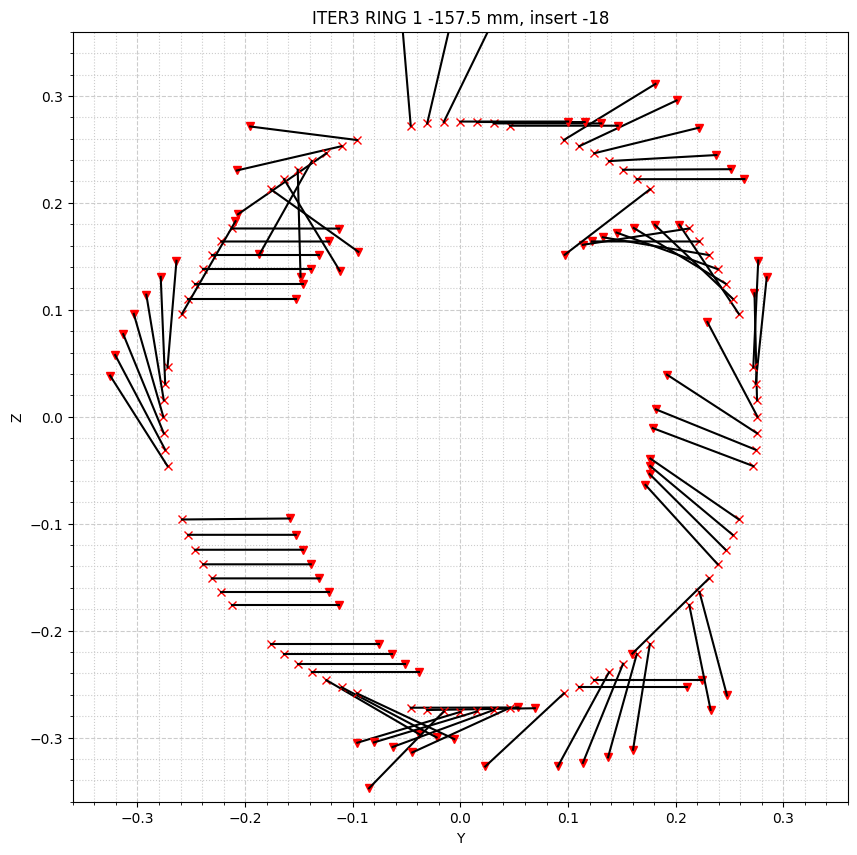

In [56]:
# MAGNET ROTATIONS RING 1
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 1
ringPosition = ringPositions_iter_3[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('ITER3 RING %d %.1f mm, insert %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions_iter_3):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xr')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        #axes.plot([YPOINT,YPOINT-direction[0]],[ZPOINT,ZPOINT-direction[1]],'k--')
        
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')


nr 168 Y 0.27211479674710887 Z -0.04614691096140277 a 251.65858506139932
nr 169 Y 0.2742709847847707 Z -0.030845208788272026 a 259.71790793476515
nr 170 Y 0.27556740718070843 Z -0.015446815196073495 a 267.9207268531474
nr 171 Y 0.276 Z 0.0 a 2.9149234133333384e-14
nr 172 Y 0.27556740718070843 Z 0.0154468151960735 a 8.537919264561393e-14
nr 173 Y 0.2742709847847707 Z 0.030845208788272037 a 3.5579789856084625e-13
nr 174 Y 0.27211479674710887 Z 0.04614691096140277 a 1.9017629889403758e-12
nr 175 Y 0.2587317822093368 Z 0.09609300117480107 a 4.693071206039655e-10
nr 176 Y 0.2529482447387227 Z 0.11042275799670676 a 317.57749767822355
nr 177 Y 0.2463717826715406 Z 0.12440636922299107 a 272.91433968683566
nr 178 Y 0.2390230114445051 Z 0.13799999999999998 a 227.01556293472834
nr 179 Y 0.2309249674754671 Z 0.15116103795771738 a 223.2560538837945
nr 180 Y 0.22210303595045067 Z 0.16384822678806393 a 230.01664805951856
nr 181 Y 0.21258487124793404 Z 0.17602179557230782 a 2.758649443015985e-10
nr 18

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

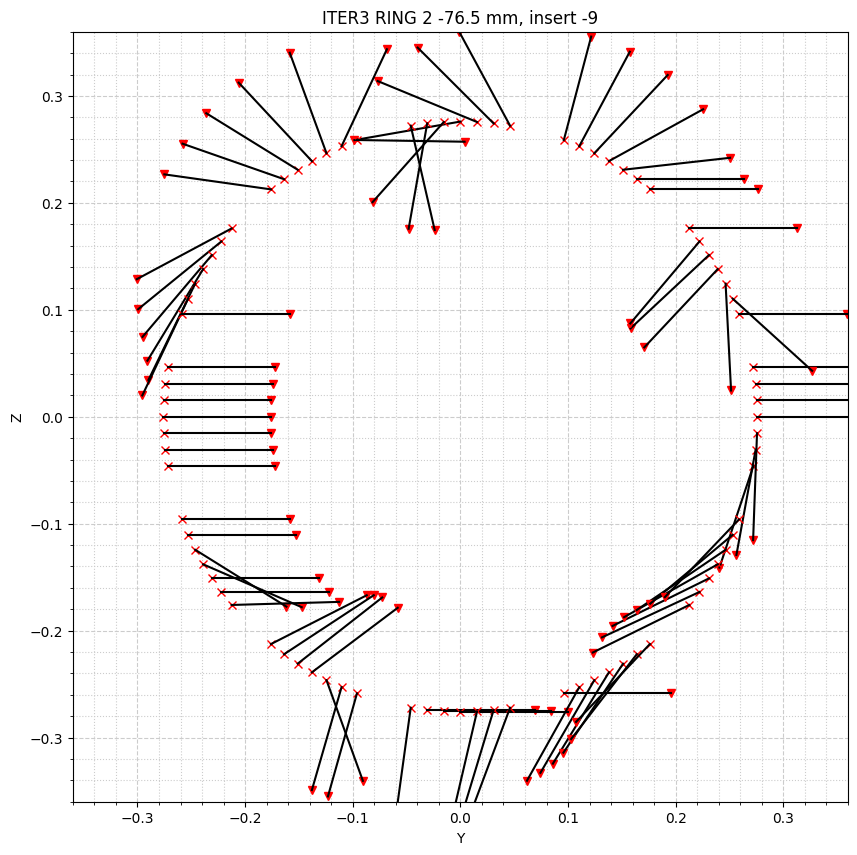

In [59]:
# MAGNET ROTATIONS RING 2
#plotting rotations
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

ring_number = 2
ringPosition = ringPositions_iter_3[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('ITER3 RING %d %.1f mm, insert %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 10e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions_iter_3):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        YPOINT = tmppos[1] # !!! 240917
        ZPOINT = tmppos[2] # !!! 240917
        print('nr',idx,'Y',YPOINT,'Z',ZPOINT,'a',angle*180/np.pi)
        axes.plot(YPOINT,ZPOINT,'xr')
        direction = [dispveclen*np.cos(angle),dispveclen*np.sin(angle)] #!!!!!!!!! 240916
        axes.plot(YPOINT+direction[0],ZPOINT+direction[1],'rv')
        axes.plot([YPOINT,YPOINT+direction[0]],[ZPOINT,ZPOINT+direction[1]],'k-')
        #axes.plot([YPOINT,YPOINT-direction[0]],[ZPOINT,ZPOINT-direction[1]],'k--')
        
        
axes.set_xlim([-360e-3,360e-3])
axes.set_ylim([-360e-3,360e-3])
axes.xaxis.set_major_locator(MultipleLocator(0.1))
axes.yaxis.set_major_locator(MultipleLocator(0.1)) 
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
        
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Y')
plt.ylabel('Z')


# ------------------------------
#   **comparing with reality**
# ------------------------------


In [60]:
b0map_iter3_SHELL = b0.b0() # current state by XXXXXX XX:XX
filename_to_import_csv_data_from_SHELL = r'./data/XXX.csv'




No path object given on construction of b0 object.
 b0 instance initialized without path.


# Comparing with **reality**

In [ ]:
# the full map with four rings
# --- REALITY IS: --- 
# ball map of the shimmed field


import numpy as np  
import b0
b0map_iter2_A = b0.b0() # as simulated
b0map_iter2_B = b0.b0() # slightly underturned 5 and 6, current state by 240926 10:10 AM
b0map_iter2_SHELL = b0.b0() # slightly underturned 5 and 6, current state by 240926 10:10 AM
b0map_iter2_BALL_MISMATCHED = b0.b0() # recalculated rotations with mismatch, current state by 240927 09:44 AM


filename_to_import_csv_data_from_A = r'./data/240907/240919_ball_4rings_R120_12pts_bvals_shifted.csv' # inserts 5 and 6 as simulated
filename_to_import_csv_data_from_B = r'./data/240925/240925_ball_R120_FOUR_RINGS_ITER2_bvals_shifted.csv' # inserts 5 and 6 /slightly/ underturned
filename_to_import_csv_data_from_SHELL = r'./data/240925/240925_sphere_R120_FOUR_RINGS_ITER2_with_mismatch_bvals.csv'
filename_to_import_csv_data_from_BALL_MISMATCHED = r'./data/240925/240925_fine_ball_R120_FOUR_RINGS_ITER2_with_mismatch_bvals_shifted.csv'
#filename_to_import_csv_data_from = r'./data/V1_magnet/2024-09-25-10-55_4_rings_iteration_2/240925_ball_overnight_R120_12pts_bvals_shifted.csv' # inserts 5 an 6 turned to optimize the 7 point homogeneity

# import map from csv file
b0map_iter2_A.import_from_csv(filename_to_import_csv_data_from_A,eulers=[90,0,-90])
# transfer to magnet coordinates
b0map_iter2_A.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=None,onesign=True,component=2)

# import map from csv file
b0map_iter2_B.import_from_csv(filename_to_import_csv_data_from_B,eulers=[90,0,-90])
# transfer to magnet coordinates
b0map_iter2_B.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=None,onesign=True,component=2)

# import map from csv file
b0map_iter2_SHELL.import_from_csv(filename_to_import_csv_data_from_SHELL,eulers=[90,0,-90])
# transfer to magnet coordinates
b0map_iter2_SHELL.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=10,onesign=True,component=2)

# import map from csv file
b0map_iter2_BALL_MISMATCHED.import_from_csv(filename_to_import_csv_data_from_BALL_MISMATCHED,eulers=[90,0,-90])
# transfer to magnet coordinates
b0map_iter2_BALL_MISMATCHED.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.01,stepsize=None,onesign=True,component=2)

In [ ]:
# shimmed field (RAW, ball, without mismatch)
# save shimmed field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter2_A.xPts
y = b0map_iter2_A.yPts
z = b0map_iter2_A.zPts

FieldMeasured_init = b0map_iter2_B.b0Data[:,:,:,2]# - b0map_iter2_A.b0Data[:,:,:,2]
#FieldMeasured[FieldMeasured==np.nanmin(FieldMeasured)] = np.nan


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7))

#xvals = b0map_comsol.xDim_SPH_fine


print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoshimmed= (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2, 3, 'V1 Magnet\niter 2.\n 4 inserts\n240925\n%.0f ppm'%abs(homoshimmed), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_init)-0.03,np.nanmean(FieldMeasured_init)+0.03],origin = 'lower',extent=[-120,120,-120,120],cmap='viridis')
        #xxx = axes[i,j].contourf(z,y,FieldMeasured_shimmed[i*5+j,:,:],vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)



homo_after_iteration_2 = (np.nanmax(abs(FieldMeasured_init))-np.nanmin(abs(FieldMeasured_init)))/np.nanmean(abs(FieldMeasured_init))*1e6
print('raw homo after Iteration 2: %.0f ppm'%homo_after_iteration_2)

plt.show()


In [ ]:
# shimmed field (RAW, ball, without mismatch)
# save shimmed field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter2_BALL_MISMATCHED.xPts
y = b0map_iter2_BALL_MISMATCHED.yPts
z = b0map_iter2_BALL_MISMATCHED.zPts

FieldMeasured_init = b0map_iter2_BALL_MISMATCHED.b0Data[:,:,:,2]# - b0map_iter2_A.b0Data[:,:,:,2]
#FieldMeasured[FieldMeasured==np.nanmin(FieldMeasured)] = np.nan


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7))

#xvals = b0map_comsol.xDim_SPH_fine


print('mean, mT: ',np.nanmean(FieldMeasured_init))
print('low, mT:',np.nanmin(FieldMeasured_init),'\nhigh, mT:',np.nanmax(FieldMeasured_init))

homoshimmed= (np.nanmax(FieldMeasured_init)-np.nanmin(FieldMeasured_init))/np.nanmean(FieldMeasured_init)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2, 3, 'V1 Magnet\niter 2.\n 4 inserts with mismatched field\n240926\n%.0f ppm'%abs(homoshimmed), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_init[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_init)-0.03,np.nanmean(FieldMeasured_init)+0.03],origin = 'lower',extent=[-120,120,-120,120],cmap='viridis')
        #xxx = axes[i,j].contourf(z,y,FieldMeasured_shimmed[i*5+j,:,:],vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)



homo_after_iteration_2 = (np.nanmax(abs(FieldMeasured_init))-np.nanmin(abs(FieldMeasured_init)))/np.nanmean(abs(FieldMeasured_init))*1e6
print('raw homo after Iteration 2: %.0f ppm'%homo_after_iteration_2)

plt.show()


In [ ]:

# spherical decomposition
diameter_of_sphere = b0map_iter2_B.path.radius*2
order = 12
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_iter2_B.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp,component=2)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter2_B.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


# plot of interpolated ball map

In [ ]:

# shimmed field measured (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_fine = b0map_iter2_B.yDim_SPH_fine
y = b0map_iter2_B.yDim_SPH_fine
z = b0map_iter2_B.zDim_SPH_fine

FieldMeasured_shimmed = b0map_iter2_B.interpolatedField


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_shimmed))
print('low, mT:',np.nanmin(FieldMeasured_shimmed),'\nhigh, mT:',np.nanmax(FieldMeasured_shimmed))

homoinit = (np.nanmax(FieldMeasured_shimmed)-np.nanmin(FieldMeasured_shimmed))/np.nanmean(FieldMeasured_shimmed)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.0, 5, '\n\n\nV1 Magnet\nShimmed Interpolated map.\n 4 rings\n240919\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shimmed[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shimmed)-0.04,np.nanmean(FieldMeasured_shimmed)+0.04],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx_finegrid = int(len(b0map_iter2_B.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_shimmed[xsliceidx_finegrid,:,:]),vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
plt.text(0.0, 0.0, 'X=%.1f'%xvals_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,interpolated'%b0map_iter2_B.xDim_SPH_fine[xsliceidx_finegrid])
plt.colorbar()
plt.show()

xsliceidx_rawgrid = int(len(b0map_iter2_B.xPts)/2)
plt.imshow(np.transpose(b0map_iter2_B.b0Data[xsliceidx_rawgrid,:,:,2]),clim=[np.nanmin(FieldMeasured_shimmed),np.nanmax(FieldMeasured_shimmed)],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter2_B.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,raw'%b0map_iter2_B.xPts[xsliceidx_rawgrid])
plt.colorbar()
plt.show()

b0_along_y_at_z0_raw = b0map_iter2_B.b0Data[xsliceidx_rawgrid,:,xsliceidx_rawgrid,2]
b0_along_y_at_z0_fine = FieldMeasured_shimmed[xsliceidx_finegrid,:,xsliceidx_finegrid]

yvals_raw = b0map_iter2_B.yPts
yvals_fine = b0map_iter2_B.yDim_SPH_fine

plt.plot(yvals_raw,b0_along_y_at_z0_raw,'bx')
plt.plot(yvals_fine,b0_along_y_at_z0_fine,'r')
plt.legend(['measured','interpolated'])


plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()

b0_along_z_at_xy0_raw = b0map_iter2_B.b0Data[xsliceidx_rawgrid,xsliceidx_rawgrid,:,2]
b0_along_z_at_xy0_fine = FieldMeasured_shimmed[xsliceidx_finegrid,xsliceidx_finegrid,:]

zvals_raw = b0map_iter2_B.zPts
zvals_fine = b0map_iter2_B.zDim_SPH_fine


plt.plot(zvals_raw,b0_along_z_at_xy0_raw,'bx')
plt.plot(zvals_fine,b0_along_z_at_xy0_fine,'r')
plt.legend(['measured','interpolated'])
plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()


b0_along_x_at_yz0_raw = b0map_iter2_B.b0Data[:,xsliceidx_rawgrid,xsliceidx_rawgrid,2]
b0_along_x_at_yz0_fine = FieldMeasured_shimmed[:,xsliceidx_finegrid,xsliceidx_finegrid]

xvals_raw = b0map_iter2_B.xPts
xvals_fine = b0map_iter2_B.xDim_SPH_fine


plt.plot(xvals_raw,b0_along_x_at_yz0_raw,'bx')
plt.plot(zvals_fine,b0_along_x_at_yz0_fine,'r')
plt.legend(['measured','interpolated'])


plt.ylabel('B0 [mT]')
plt.xlabel('X [mm]')
plt.show()


# Shell map with 4 rings 
## mismatch considered 

In [ ]:
# shimmed field (RAW, without mismatch)
# save shimmed field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_raw = b0map_iter2_SHELL.xPts
y = b0map_iter2_SHELL.yPts
z = b0map_iter2_SHELL.zPts

FieldMeasured_shell_iter_2 = b0map_iter2_SHELL.b0Data[:,:,:,2]# - b0map_iter2_A.b0Data[:,:,:,2]
#FieldMeasured[FieldMeasured==np.nanmin(FieldMeasured)] = np.nan


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7,7))

#xvals = b0map_comsol.xDim_SPH_fine


print('mean, mT: ',np.nanmean(FieldMeasured_shell_iter_2))
print('low, mT:',np.nanmin(FieldMeasured_shell_iter_2),'\nhigh, mT:',np.nanmax(FieldMeasured_shell_iter_2))

homoshimmed= (np.nanmax(FieldMeasured_shell_iter_2)-np.nanmin(FieldMeasured_shell_iter_2))/np.nanmean(FieldMeasured_shell_iter_2)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2, 3, 'V1 Magnet\niter 2.\n 4 inserts\nShell\n240926\n%.0f ppm'%abs(homoshimmed), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shell_iter_2[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shell_iter_2)-0.05,np.nanmean(FieldMeasured_shell_iter_2)+0.05],origin = 'lower',extent=[-120,120,-120,120],cmap='viridis')
        #xxx = axes[i,j].contourf(z,y,FieldMeasured_shimmed[i*5+j,:,:],vmin=np.nanmin(FieldMeasured_shimmed),vmax=np.nanmax(FieldMeasured_shimmed))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Y')
        plt.ylabel('Z')
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)



homo_after_iteration_2 = (np.nanmax(abs(FieldMeasured_init))-np.nanmin(abs(FieldMeasured_init)))/np.nanmean(abs(FieldMeasured_init))*1e6
print('raw homo after Iteration 2: %.0f ppm'%homo_after_iteration_2)

plt.show()


# Spherical Harm. Decomposition
## of the shell map

In [ ]:

# spherical decomposition
diameter_of_sphere = b0map_iter2_SHELL.path.radius*2
order = 12
resolution_of_sph_decomp = 7
print(diameter_of_sphere)

b0map_iter2_SHELL.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp,component=2)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter2_SHELL.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)

# plot of extrapolated shell map
## in the spherical volume

In [ ]:

# shimmed field measured (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals_fine = b0map_iter2_SHELL.yDim_SPH_fine
y = b0map_iter2_SHELL.yDim_SPH_fine
z = b0map_iter2_SHELL.zDim_SPH_fine

FieldMeasured_shimmed_from_shell = b0map_iter2_SHELL.interpolatedField


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(FieldMeasured_shimmed_from_shell))
print('low, mT:',np.nanmin(FieldMeasured_shimmed_from_shell),'\nhigh, mT:',np.nanmax(FieldMeasured_shimmed_from_shell))

homoinit = (np.nanmax(FieldMeasured_shimmed_from_shell)-np.nanmin(FieldMeasured_shimmed_from_shell))/np.nanmean(FieldMeasured_shimmed_from_shell)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.0, 5, '\n\n\nV1 Magnet\nShimmed\nExtrapolated from shell\n 4 rings\n240926\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(np.transpose(FieldMeasured[i*5+j,:,:]),clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].imshow(np.transpose(FieldMeasured_shimmed_from_shell[i*5+j,:,:]),clim=[np.nanmean(FieldMeasured_shimmed_from_shell)-0.03,np.nanmean(FieldMeasured_shimmed_from_shell)+0.03],origin = 'lower',extent=[-120,120,-120,120])
        
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx_finegrid = int(len(b0map_iter2_SHELL.xDim_SPH_fine)/2)
plt.contourf(y,z,np.transpose(FieldMeasured_shimmed_from_shell[xsliceidx_finegrid,:,:]),vmin=np.nanmean(FieldMeasured_shimmed_from_shell)-0.03,vmax=np.nanmean(FieldMeasured_shimmed_from_shell)+0.03)
plt.text(0.0, 0.0, 'X=%.1f'%xvals_fine[xsliceidx_finegrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field from shell,X=%.1f mm,extrapolated'%b0map_iter2_SHELL.xDim_SPH_fine[xsliceidx_finegrid])
plt.colorbar()
plt.show()

xsliceidx_rawgrid = int(len(b0map_iter2_B.xPts)/2)
plt.imshow(np.transpose(b0map_iter2_SHELL.b0Data[xsliceidx_rawgrid,:,:,2]),clim=[np.nanmin(FieldMeasured_shimmed_from_shell),np.nanmax(FieldMeasured_shimmed_from_shell)],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter2_SHELL.xPts[xsliceidx_rawgrid], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('shimmed field measured,X=%.1f mm,shell data'%b0map_iter2_SHELL.xPts[xsliceidx_rawgrid])
plt.colorbar()
plt.show()


# **DIFF** maps

## difference between measured maps

### shimmed - unshimmed =?= shim field

# shimmed simulated - shimmed measured
## as a correction for the 4 ring sim (recalculation)

In [393]:
smulated_shimmed_field = shimmed_Field_simulated_RENDERED
measured_shimmed_field = b0map_iter2_SHELL.interpolatedField # was iter2_B before

mismatch_of_sim_and_measurement = measured_shimmed_field - smulated_shimmed_field
zeroed_mismatch_field = mismatch_of_sim_and_measurement - np.nanmean(mismatch_of_sim_and_measurement)

# this mismatch must be added to the initial map



In [ ]:
# plot the difference map
# measured shimmed - measured initial

OFST_meas_vs_sim = 0# mT
 
plt.figure(0)


xvals_fine = b0map_iter2_SHELL.yDim_SPH_fine
y = b0map_iter2_SHELL.yDim_SPH_fine
z = b0map_iter2_SHELL.zDim_SPH_fine

MISMATCH_FIELD_TO_PLOT = zeroed_mismatch_field


print(np.shape(MISMATCH_FIELD_TO_PLOT))


fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

print('mean, mT: ',np.nanmean(MISMATCH_FIELD_TO_PLOT))
print('low, mT:',np.nanmin(MISMATCH_FIELD_TO_PLOT),'\nhigh, mT:',np.nanmax(MISMATCH_FIELD_TO_PLOT))

homoinit = (np.nanmax(MISMATCH_FIELD_TO_PLOT)-np.nanmin(MISMATCH_FIELD_TO_PLOT))/np.nanmean(MISMATCH_FIELD_TO_PLOT)*1e6

      
for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.6, 5, '\n\n\nV1 Magnet\nShimmed mismatch\n 4 rings\n240919', horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(MISMATCH_FIELD_TO_PLOT[i*5+j,:,:]),clim=[np.nanmean(MISMATCH_FIELD_TO_PLOT)-0.01,np.nanmean(MISMATCH_FIELD_TO_PLOT)+0.01],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(z,y,np.transpose(FieldMeasured[i*5+j,:,:]),vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))

        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()



In [ ]:
# diference between initial and shimmed maps. measured

# FieldMeasured is initially measured field
# FieldMeasuredShimmed is field measured with rings 

print(np.nanmin(b0map_iter2_B.interpolatedField)) # interpolated stuff
print(np.nanmin(b0map_iter1.interpolatedField))


print(np.nanmax(b0map_iter2_B.interpolatedField))
print(np.nanmax(b0map_iter1.interpolatedField))

field_diff_init_shimmed_measured = b0map_iter2_B.interpolatedField - b0map_iter1.interpolatedField



# Shimming iteration 3
## with one ring

In [ ]:
# get the measured shimmed map, interpolate, plot, consider line plots.
# generate shim magnets in one ring, place in the center at first.
# shim with one ring
# consider 5,6,7 mm magnets

max_val_iter_2 = np.nanmax(b0map_iter2_SHELL.interpolatedField)
min_val_iter_2 = np.nanmin(b0map_iter2_SHELL.interpolatedField)

print(max_val_iter_2)
print(min_val_iter_2)


# Defining magnet positions in the ring

In [ ]:
#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          =276*1e-3  # radius on which the shim magnets are placed

trays_occupied = [-20,-18,-9]  # [-13,-5,1,13] # for iteration 2 [-16, -8, 8, 16] # for iteration 1
ringPositions_iter_3       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print('rings at ',np.array(ringPositions_iter_3)*1e3,'mm')


In [ ]:
magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions_iter_3 = []

for ringPosition in ringPositions_iter_3:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            positions_iter_3.append(position)
                
print(len(positions_iter_3))

for pos in positions_iter_3:
    print('x',pos[0],'y',pos[1],'z',pos[2])

In [ ]:
import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions_iter_3):

    axs.scatter(position[1],position[2],color = [0,idx/len(positions_iter_3),1-idx/len(positions_iter_3)])
    
axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Shimming Ring, iteration 3')

# Rendering of the shim magnet fields

In [967]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets


initialField = b0map_iter2_SHELL.interpolatedField

numMags_iter_3 = len(positions_iter_3)
coordinate_grid = b0map_iter2_SHELL.coord_grid_fine



magnetFields_iter_3 = np.zeros((np.shape(initialField)+(3,numMags_iter_3)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom


from utils import shimming_magnet


DSV = 2*max(b0map_iter2_SHELL.xDim_SPH_fine)#b0map.path.radius*2


In [ ]:

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


def NEW_singleMagnet(position,dipoleVector,xPts,yPts,zPts):
    '''
    renders 3 components o the field of one magnet in a cubic grid made of xPts, yPts and zPts
    '''
    x,y,z = np.meshgrid(xPts, yPts, zPts, indexing='xy')  
    coord = [x,y,z]
    
    B0 = B0 = np.zeros((len(xPts),len(yPts),len(zPts))+(3,), dtype=np.float32)
    for i in range(len(xPts)):
        for j in range(len(yPts)):
            for k in range(len(zPts)):
                x_i = xPts[i]*1e-3-position[0]
                y_j = yPts[j]*1e-3-position[1]
                z_k = zPts[k]*1e-3-position[2]
                
                rabs = np.sqrt((x_i)**2+(y_j)**2+(z_k)**2)
                
                m_x = dipoleVector[0]
                m_y = dipoleVector[1]
                m_z = dipoleVector[2]
                
                
                
                B0[i,j,k,0] = 3*x_i*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_x/rabs**3
                B0[i,j,k,1] = 3*y_j*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_y/rabs**3
                B0[i,j,k,2] = 3*z_k*(m_x*x_i+m_y*y_j+m_z*z_k)/rabs**5 - m_z/rabs**3
            
    
    return B0
    
xpts = b0map_iter2_SHELL.xDim_SPH_fine
ypts = b0map_iter2_SHELL.yDim_SPH_fine
zpts = b0map_iter2_SHELL.zDim_SPH_fine

positionofsinglemagnet = [40e-3,40e-3,0]
onemagnetfield = NEW_singleMagnet(position=positionofsinglemagnet,dipoleVector=dip_vec,xPts = xpts,yPts=ypts,zPts=zpts)     

plt.show()
xsliceidx = int(len(xpts)/2)
plt.imshow(np.transpose(onemagnetfield[xsliceidx,:,:,2]),origin='lower',extent=[np.nanmin(ypts),np.nanmax(ypts),np.nanmin(zpts),np.nanmax(zpts)])
plt.title('X=%.1f mm '%xpts[xsliceidx]+'magnet at '+str(positionofsinglemagnet)+' m')
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

In [ ]:
# Rendering shim magnets fields

shimming_magnets_iter_3 = []

for idx1, position in enumerate(positions_iter_3):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    
    
    print('rendering magnet # ',str(idx1),' at ',str(position))
    magnetFields_iter_3[:,:,:,:,idx1] = NEW_singleMagnet(position=position,dipoleVector=dip_vec,xPts=b0map_iter2_SHELL.xDim_SPH_fine,yPts=b0map_iter2_SHELL.yDim_SPH_fine,zPts = b0map_iter2_SHELL.zDim_SPH_fine)
    
    shimming_magnets_iter_3.append(magnet)
    
    
    print(magnet)

magnetFields_iter_3 *= 1e3

print(DSV)

# Visualizing field of one shim magnet

In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

x = b0map_iter2_SHELL.xDim_SPH_fine*1e0
y = b0map_iter2_SHELL.yDim_SPH_fine*1e0
z = b0map_iter2_SHELL.zDim_SPH_fine*1e0

magnet_index = 0
yzsliceidx = 1#int(len(x)/2)
v=max(b0map_iter2_SHELL.xDim_SPH_fine)
dipole_pointer_length = 25

for i in range(3):
    alpha = i*2*np.pi/8
    position = positions_iter_3[magnet_index]
    direction = [np.cos(alpha)*dipole_pointer_length,np.sin(alpha)*dipole_pointer_length]
    
    cheapfield = magnetFields_iter_3[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)
    
    print('magnet at ', np.array(positions_iter_3[magnet_index])*1e3)
    plt.contourf(y,z,np.transpose(cheapfield),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xk')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vk')
    
    plt.title('cheap %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter2_SHELL.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    magnet = shimming_magnets_iter_3[magnet_index]
    magnet.rotation_yz = -alpha
    magnet.bRem = bRem
    magnet.B0 = magnet.B0*0
    magnet.render_field(grid=coordinate_grid)
    magnet.B0*=1e3

    plt.contourf(y,z,np.transpose(magnet.B0[yzsliceidx,:,:,2]),vmin=-1e-3, vmax=1e-3,levels=100)
    plt.plot(position[1]*1e3,position[2]*1e3,'xr')
    plt.plot(position[1]*1e3+direction[0],position[2]*1e3+direction[1],'vr')
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.colorbar()
    plt.show()
    
    # # DIFF
    # plt.imshow(1e3*(magnet.B0[yzsliceidx,:,:,1])-cheapfield,vmin=-1e-9, vmax=1e-9,extent=[-v,v,-v,v],origin='lower')#!!!!!!!!! 240912
    # plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    # plt.xlabel('Z')
    # plt.ylabel('Y')
    # plt.colorbar()
    # plt.show()
    
    
    # ax = plt.subplot(1,1,1)
    # mpbl = ax.contourf(y2d,z2d,(1e3*(magnet.B0[yzsliceidx,:,:,1])),cmap='viridis',levels=64,vmin=-1e-3, vmax=1e-3)#,vmin = -scale, vmax= scale)
    # ax.set_aspect('equal')
    
    # plt.xlabel('Y')
    # plt.ylabel('Z')
    # plt.title('contourf %.0f deg'%(alpha*180/np.pi))
    # plt.show()

# Visualizing the field of **all** shim magnets of Iteration 3

### checking the field produced at different rotations

### plotting the field at one slice

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

x = b0map_iter2_SHELL.xDim_SPH_fine*1e0
y = b0map_iter2_SHELL.yDim_SPH_fine*1e0
z = b0map_iter2_SHELL.zDim_SPH_fine*1e0

ONEINSERTFIELD = shimming_magnets_iter_3[0].B0*0

ax = plt.figure().add_subplot()

for idx in range(len(positions_iter_3)): #range(40):#

    position = positions_iter_3[idx]

    alpha =  np.pi/2#optimized_vector_of_magnet_rotations[idx]#np.pi
    
    magnet = shimming_magnets_iter_3[idx]
    magnet.rotation_yz = -alpha 
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    print(shimming_magnets_iter_3[idx])

    ONEINSERTFIELD += magnet.B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(alpha),dispveclen*np.sin(alpha)] #!!!!!!!!! 240916
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

ONEINSERTFIELD*=1e3 #mT
scale = 0.1
yzsliceindex = 20
mpbl = ax.contourf(y,z,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)#,vmin=np.nanmin(ONEINSERTFIELD[:,:,:,2]),vmax=np.nanmax(ONEINSERTFIELD[:,:,:,2]))#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f,a=%.0f°'%(x[yzsliceindex],alpha*180/np.pi))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

# Rendering field of shim magnets
### in the volume of the ball

In [ ]:
MagnetsField_simulated = shimming_magnets_iter_3[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions_iter_3):
    print(pos)
    alpha = np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields_iter_3[:,:,:,2,magnet_index]*np.cos(alpha)-magnetFields_iter_3[:,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter2_SHELL.sphere_mask
#MagnetsField_simulated*=1e3 

print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))

In [ ]:
# expected shim field in the ball with all magnets same direction
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2_SHELL.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 5, 'shim field simulated /cheap/\nall magnets\nalpha=%.0f'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,np.transpose(MagnetsField_simulated[i*5+j,:,:]),vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        plt.xlabel('Y')
        plt.ylabel('Z')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()

# Masking the shim magnet fields 

### with a spherical mask

# Stacking the components of the masked fields [B_y,B_z] 

In [ ]:
b0map = b0map_iter2_SHELL

DSV = b0map.path.radius*1.98 # 
DSV_INNER = b0map.path.radius*1.95 #!!! the optimization shell is close to the surface, but not at the surface 
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields_iter_3))

maskedFields = magnetFields_iter_3[sphereMask == 1, :,:].astype(float)
maskedFields_stacked_iter_3 = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # stacking Y and Z components of the rendered fields, masked with a spherical mask


plt.imshow(maskedFields_stacked_iter_3) #

# Rotating the stacked fields
### with matmul to *-sin* and *cos* of the field components 

In [39]:
print(np.shape(maskedFields_stacked_iter_3))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])


print('shape of masked fields',np.shape(maskedFields_stacked_iter_3))
print('shape of magnet rotation vector',np.shape(vector_of_magnet_rotations))
print('shape of stacked rotation vector',np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)

print('nr of field points to optimize',np.shape(rotatedFieldOfShimMagnetsStacked))

initialField_iteration_3 = b0map_iter2_SHELL.interpolatedField

initialFieldMasked_iteration_3 = initialField_iteration_3[sphereMask == 1]




(2400, 504)
shape of masked fields (2400, 504)
shape of magnet rotation vector (252,)
shape of stacked rotation vector (504,)
nr of field points to optimize (2400,)


In [40]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)]) #!!!240918
            shimField = np.matmul(maskedFields_stacked_iter_3,stackedRotationVector)+initialFieldMasked_iteration_3

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

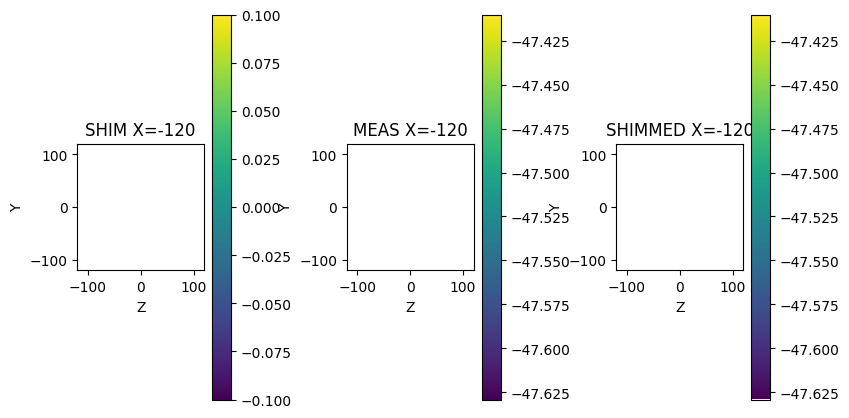

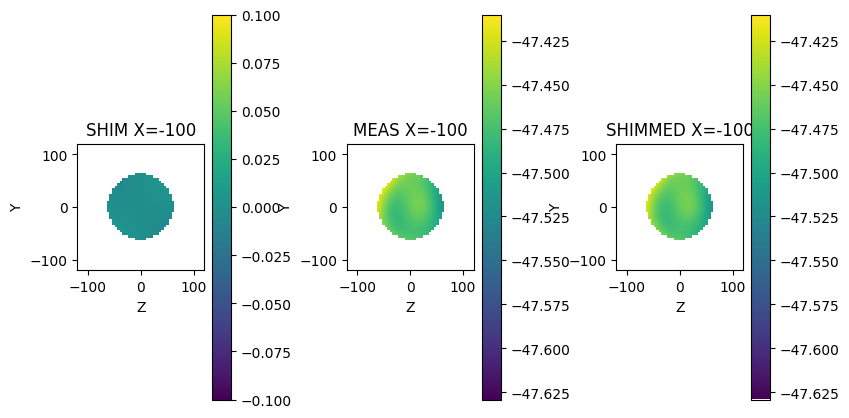

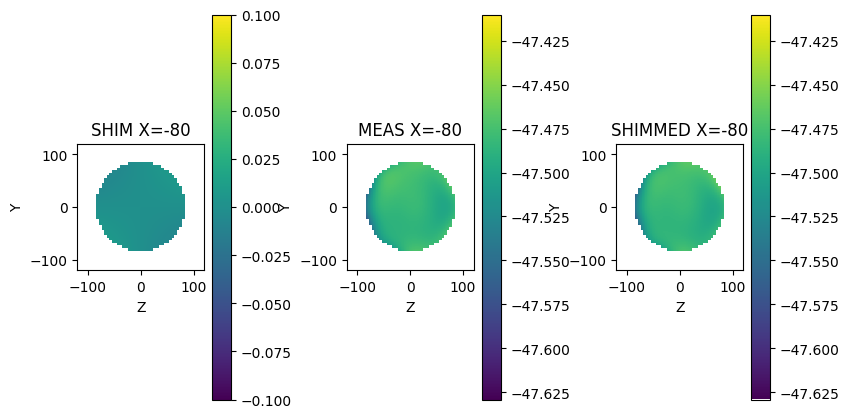

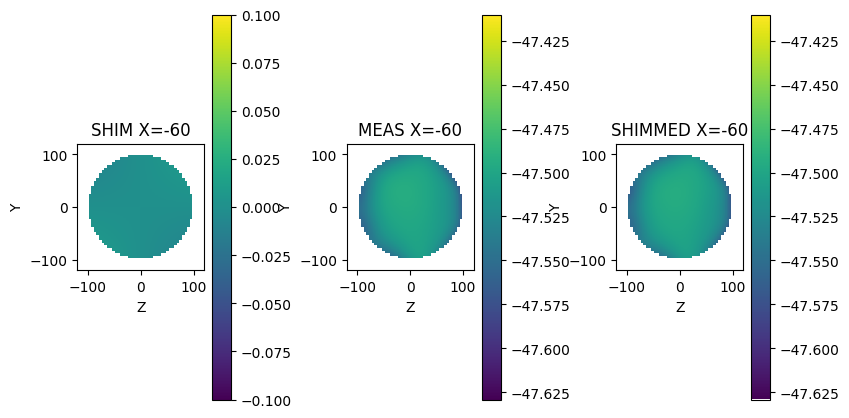

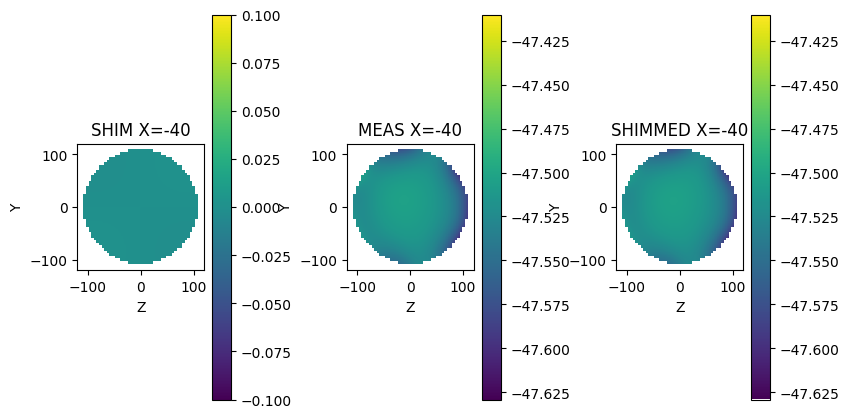

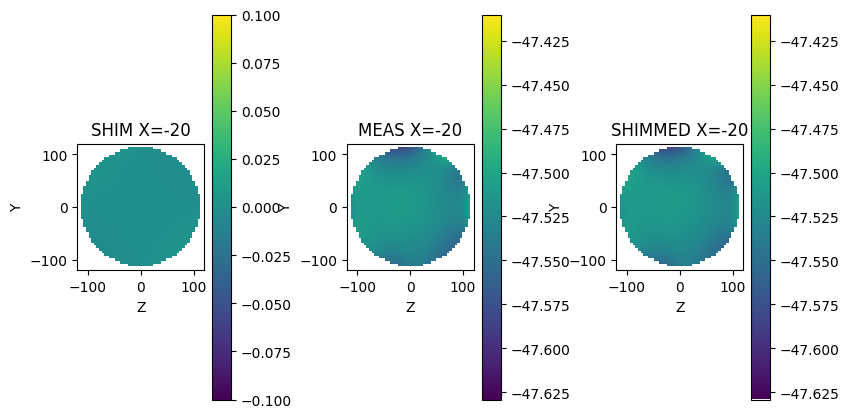

KeyboardInterrupt: 

In [41]:
#render the field of rotated magnets
optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
#optimized_vector_of_magnet_rotations = np.load('optIter3_3rings.npy')
#optimized_vector_of_magnet_rotations = np.load('optIter3_2rings.npy')
#optimized_vector_of_magnet_rotations = np.load('optIter3_1ring.npy')



shimField_Rotated = np.matmul(magnetFields_iter_3[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields_iter_3[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
shimField_Rotated*=b0map_iter2_SHELL.sphere_mask

FieldShimmed = initialField_iteration_3+shimField_Rotated


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(initialField)



for slicenr in range(0,len(xvals_fine),int(len(xvals_fine)/10)):
#slicenr = 17
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,5))
    xxx = axes[0].imshow(shimField_Rotated[slicenr,:,:],vmin=-1e-1,vmax=1e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[0].set_title('SHIM X=%.0f'%xvals_fine[slicenr])
    axes[0].set_xlabel('Z')
    axes[0].set_ylabel('Y')
    
    
    xxx = axes[1].imshow(initialField_iteration_3[slicenr,:,:],origin='lower',vmin=np.nanmin(initialField_iteration_3[:,:,:]),vmax = np.nanmax(initialField_iteration_3[:,:,:]),extent=[-120,120,-120,120])
    plt.colorbar(mappable=xxx)
    axes[1].set_title('MEAS X=%.0f'%xvals_fine[slicenr])
    axes[1].set_xlabel('Z')
    axes[1].set_ylabel('Y')
    

    xxx = axes[2].imshow(FieldShimmed[slicenr,:,:],origin='lower',
            vmin=np.nanmin(initialField[:,:,:]+shimoffset),
            vmax = np.nanmax(initialField[:,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar(mappable = xxx)
    axes[2].set_xlabel('Z')
    axes[2].set_ylabel('Y')
    
    axes[2].set_title('SHIMMED X=%.0f'%xvals_fine[slicenr])
    axes[2].set_xlabel('Z')
    axes[2].set_ylabel('Y')
    
    plt.subplots_adjust(wspace=0.7)
    plt.show()



# run the lsq optimization of the rotation vector

In [ ]:
# now do the least squares optimization
#vector_of_magnet_rotations =np.load('optIter3_2rings.npy')# 2 ring shim
#vector_of_magnet_rotations =np.load('optIter3_1ring.npy')# 2 ring shim
vector_of_magnet_rotations =np.load('optIter3_3rings.npy')# 2 ring shim

#vector_of_magnet_rotations = np.zeros(len(shimming_magnets_iter_3))#+0*np.pi/2#vector_of_magnet_rotations*0 ##

cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=10000, xtol = 1e-6,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))

optimized_vector_of_magnet_rotations = lsqData.x


#np.save('optIter3_2rings.npy',optimized_vector_of_magnet_rotations)
np.save('optIter3_3rings.npy',optimized_vector_of_magnet_rotations)

In [ ]:

shimField_Rendered = shimming_magnets_iter_3[0].B0[:,:,:,2]*0 # container for the shimmed field

# render the shim field by given rotations of each shimming magnet
for idx, magnet in enumerate(shimming_magnets_iter_3):
    alpha = optimized_vector_of_magnet_rotations[idx]

    magnet.rotation_yz = -alpha # beware of the sign
    magnet.bRem = bRem*1
    magnet.render_field(grid=coordinate_grid)
    shimField_Rendered += magnet.B0[:,:,:,2]

shimField_Rendered *= 1.0e3

shimmed_Field_simulated_RENDERED = initialField_iteration_3 +shimField_Rendered # shimmed field computed with rendering fields of each magnet
shimField_Rotated = np.matmul(magnetFields_iter_3[...,1,:], -np.sin(lsqData.x)) + \
    np.matmul(magnetFields_iter_3[...,2,:], np.cos(lsqData.x)) # shimmed field computed with rotating the pre-rendered fields

shimmed_Field_simulated_ROTATED = initialField_iteration_3+shimField_Rotated

homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_cheap = (np.nanmax(shimmed_Field_simulated_ROTATED)-np.nanmin(shimmed_Field_simulated_ROTATED))/np.nanmean(shimmed_Field_simulated_ROTATED)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_ROTATED))))


homoinit = (np.nanmax(initialField_iteration_3)-np.nanmin(initialField_iteration_3))/np.nanmean(initialField_iteration_3)*1e6
homo_fair = (np.nanmax(shimmed_Field_simulated_RENDERED)-np.nanmin(shimmed_Field_simulated_RENDERED))/np.nanmean(shimmed_Field_simulated_RENDERED)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField_iteration_3)),abs(np.nanmean(shimmed_Field_simulated_RENDERED))))

shimoffset = np.nanmean(shimmed_Field_simulated_ROTATED) - np.nanmean(initialField_iteration_3)
#d = np.shape(coordinate_grid[0])
#print(d[0])

# plot the simulated shimmed field

In [ ]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(5, 10))

xvals_fine = b0map_iter2_SHELL.xDim_SPH_fine

simulated_shim_Field_masked = shimField_Rendered*b0map_iter2_SHELL.sphere_mask


for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_fine):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(2.1, 5, 'shim field simulated\niter 3, 3 rings\nangles optimized\nhomo %.0f ppm\nbrem=%.2f T'%(abs(homo_fair),shimming_magnets_iter_3[0].bRem), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(np.transpose(simulated_shim_Field_masked[i*5+j,:,:]),clim=[np.nanmin(simulated_shim_Field_masked),np.nanmax(simulated_shim_Field_masked)],origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].contourf(y,z,np.transpose(optimized_shim_Field_masked[i*5+j,:,:]),vmin=np.nanmin(optimized_shim_Field_masked),vmax=np.nanmax(optimized_shim_Field_masked),levels=16)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        
        #plt.xlabel('Z')
        #plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER3_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER3_1RING.pdf',format="pdf")
plt.show()


# plot simulated shimmed field

In [ ]:

# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(9, 9))

SIMULATED_SHIMMED_FIELD_TO_PLOT = shimmed_Field_simulated_RENDERED

shimoffset = np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT) - np.nanmean(FieldMeasured_init)

homoshimmed = abs((np.nanmax(SIMULATED_SHIMMED_FIELD_TO_PLOT)-np.nanmin(SIMULATED_SHIMMED_FIELD_TO_PLOT))/np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)*1e6)
#homoshimmed = abs((np.nanmax(shimmed_Field_simulated_flipped_Y)-np.nanmin(shimmed_Field_simulated_flipped_Y))/np.nanmean(shimmed_Field_simulated_flipped_Y)*1e6)

print('shimmed simulated HOMO,ppm:',homoshimmed)

xvals_raw = b0map_iter2_SHELL.xDim_SPH_fine

for i in range(10):
    for j in range(5):
        if i*5+j >=len(xvals_raw):
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(1.1, 4.6, 'shimmed field simulated\nIter 3, 3 rings\nbRem = %.2f T\n%.0f ppm'%(shimming_magnets[0].bRem,homoshimmed) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break

        #xxx = axes[i,j].contourf(shimmed_Field_final[i*5+j,:,:],vmin=np.nanmin(shimmed_Field_final),vmax=np.nanmax(shimmed_Field_final),origin = 'lower',extent=[-120,120,-120,120])
    
        xxx = axes[i,j].imshow(np.transpose(SIMULATED_SHIMMED_FIELD_TO_PLOT[i*5+j,:,:]),vmin=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)-0.02,vmax=np.nanmean(SIMULATED_SHIMMED_FIELD_TO_PLOT)+0.02,origin = 'lower',extent=[-120,120,-120,120])
        #xxx = axes[i,j].imshow(np.transpose(shimmed_Field_simulated_flipped_Y[i*5+j,:,:]),vmin=np.nanmin(shimmed_Field_simulated),vmax=np.nanmax(shimmed_Field_simulated),origin = 'lower',extent=[-120,120,-120,120])
        
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals_raw[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==9:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Y')
        axes[i,j].set_ylabel('Z')
        axes[i,j].set_aspect(1)
        plt.xlabel('Y')
        plt.ylabel('Z')

        
plt.title('one ring, cheap render')        
plt.subplots_adjust(wspace=-0.8, hspace=0.0)
plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
plt.show()




# magnet rotations in rings